# GfK Code Challenge: End-to-End Machine Learning Project

## 1. Create Workspace

In [179]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [3]:
# We import the libraries needed to read the dataset
import os 
import numpy as np 
import pandas as pd
#pd.options.display.mpl_style = 'default'

# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# Figures inline and set visualization style
# Graphics in SVG format are more sharp and legible
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %config InlineBackend.figure_format='svg'  # uncomment this line just at the end of your coding
import matplotlib.pyplot as plt
plt.style.use('bmh')

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

## 2. Get the data

In [4]:
# We placed the dataset under data/ sub folder
DATASET_PATH = '../data/'

In [5]:
# A small function to load the data
# NOTE: if you use header=True, you get a TypeError: 
# TypeError: Passing a bool to header is invalid. 
# Use header=None for no header or header=int or list-like 
# of ints to specify the row(s) making up the column names

def load_gfk_data(dataset_name, dataset_path=DATASET_PATH):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path, sep=";", header='infer')

In [6]:
train_df = load_gfk_data("training.csv") # training set as a Pandas DataFrame
valid_df = load_gfk_data("validation.csv") # validation set ""    ""    "" 

### 2.2 Checking the dataframe ... quick peek  

In [7]:
# Checking the shape of the dataframes
print("The training set has shape : {0}".format(train_df.shape))
print("The validation set has shape : {0}".format(valid_df.shape))

The training set has shape : (3700, 18)
The validation set has shape : (200, 18)


In [8]:
# Checking the data types of the two dateframes 
print("Data types of the training dataframe")
train_df.dtypes

Data types of the training dataframe


v1             object
v2             object
v3             object
v4             object
v5             object
v6             object
v7             object
v8             object
v9             object
v10             int64
v11            object
v12            object
v13           float64
v14             int64
v15           float64
v16            object
v17             int64
classLabel     object
dtype: object

In the `training.csv` dataset there are 3700 instances, and 18 columns, or *attributes*. Some attributes are numerical (e.g. `float64` and `int64`), but most of them are `object`. So they could hold any kind of `Python` object, but since we loaded this data from a CSV file we know that they must be a *text attribute*. A similar observation - even if with different size - holds for the `validation.csv`.   
Let's take a look at the top five rows using DataFrame's `head()` method:

In [9]:
train_df.head()

v1     v2         v3 v4                  v5                 v6     v7 v8 v9  \
0  a  17,92    5,4e-05  u  -0,840182024985552  0,522882590622095   1,75  f  t   
1  b  16,92   3,35e-05  y   -2,15963506605476  0,774187133555115   0,29  f  f   
2  b  31,25  0,0001125  u    1,75068668089807   0,76036270650308      0  f  t   
3  a  48,17  0,0001335  u    4,17487068567425  0,888963139486792  0,335  f  f   
4  b  32,33    0,00035  u   -3,78547915257514  0,489023844085239    0,5  f  f   

   v10 v11 v12    v13  v14        v15  v16  v17 classLabel  
0    1   t   g   80.0    5   800000.0    t    0        no.  
1    0   f   s  200.0    0  2000000.0  NaN    0        no.  
2    1   f   g   96.0   19   960000.0    t    0        no.  
3    0   f   g    0.0  120        0.0  NaN    0        no.  
4    0   t   g  232.0    0  2320000.0    f    0        no.

In [10]:
valid_df.head()

v1     v2         v3 v4            v5           v6     v7 v8 v9  v10 v11  \
0  b  32,33    0,00075  u   0,840107307  0,544982291  1,585  t  f    0   t   
1  b  23,58   0,000179  u  -4,174395711  0,864361709   0,54  f  f    0   t   
2  b  36,42   7,50E-05  y    2,23222567  0,627475551  0,585  f  f    0   f   
3  b  18,42  0,0010415  y  -2,469969629  0,846741022  0,125  t  f    0   f   
4  b   24,5  0,0013335  y  -3,149422333  0,321087006   0,04  f  f    0   t   

  v12    v13  v14      v15  v16  v17 classLabel  
0   s  420.0    0  4200000  NaN    1        no.  
1   g  136.0    1  1360000  NaN    0        no.  
2   g  240.0    3  2400000  NaN    1        no.  
3   g  120.0  375  1200000  NaN    0        no.  
4   g  120.0  475  1200000    f    1        no.

Recall that each row corresponds to one instance - the **object** of our research - and the columns are the **features** of the object: precisely, the first 17 columns are the features (or predictors) while the last one (`classLabel`) is the supervised label, or target variable. It is binary: `yes` or `no`. Later, we will buil models that predict this variable based on the remaining features. This is why we call it a *target*.  

When you looked at the top five rows, you probably noticed that the values in some columns - like e.g. `v2`, `v3`, `v5` etc. - are numeric with `','` (e.g. for European data format) instead of `'.'` as decimal mark.  
In order to perform such a conversion, we might simply use Pandas Dataframe `replace()` method, like e.g.: 

`train_df['v2'].replace(regex=True,inplace=True,to_replace=r',',value=r'.')`

However, Pandas supports this out of the box, using the built-in parameter `decimal=`, which is the character to recognize as decimal point (see [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).   

In [11]:
train_df = pd.read_csv(DATASET_PATH + "training.csv", sep=";", header='infer', decimal=",")
valid_df = pd.read_csv(DATASET_PATH + "validation.csv", sep=";", header='infer', decimal=",")

### 2.3 Exploratoring Data Analysis (EDA) 
Let's start exploring the training (and validation) set by creating a copy so that we can play with it without harming the original training set:  

In [12]:
train_cp = train_df.copy()
valid_cp = valid_df.copy()

The `info()` method is useful to get a quick description of the data, in particular the total number of rows, and each attributes type and number of *non-null* values:

In [14]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 18 columns):
v1            3661 non-null object
v2            3661 non-null float64
v3            3700 non-null float64
v4            3636 non-null object
v5            3700 non-null float64
v6            3700 non-null float64
v7            3700 non-null float64
v8            3700 non-null object
v9            3700 non-null object
v10           3700 non-null int64
v11           3700 non-null object
v12           3700 non-null object
v13           3600 non-null float64
v14           3700 non-null int64
v15           3600 non-null float64
v16           1555 non-null object
v17           3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(7), int64(3), object(8)
memory usage: 520.4+ KB


In [15]:
train_cp.describe()

v2           v3           v5           v6           v7  \
count  3661.000000  3700.000000  3700.000000  3700.000000  3700.000000   
mean     32.820713     0.000585    -0.053318     0.784188     3.439496   
std      12.666181     0.000540     2.871240     0.136514     4.335229   
min      13.750000     0.000000    -4.996939     0.273945     0.000000   
25%      23.000000     0.000150    -2.516349     0.693130     0.500000   
50%      28.670000     0.000425    -0.052786     0.787842     1.750000   
75%      40.830000     0.000963     2.406251     0.876052     5.000000   
max      80.250000     0.002800     4.999274     1.215066    28.500000   

               v10          v13            v14           v15          v17  
count  3700.000000  3600.000000    3700.000000  3.600000e+03  3700.000000  
mean      4.160000   162.695000    2246.705946  1.626950e+06     0.925405  
std       6.750553   156.045682    8708.571126  1.560457e+06     0.262772  
min       0.000000     0.000000       0.000000  0.000000e+00     0.000000  
25%       0.000000     0.000000       0.000000  0.000000e+00     1.000000  
50%       2.000000   120.000000     113.000000  1.200000e+06     1.000000  
75%       6.000000   280.000000    1059.750000  2.800000e+06     1.000000  
max      67.000000  1160.000000  100000.000000  1.160000e+07     1.000000

The `describe()` method shows basic statistical characteristics of each numerical feature (`int64` and `float64`): the `count`, `mean`, `min`, and `max` rows are self-explanatory. The `std` row shows the *standard deviation*, which measures how dispersed the values are. The 25$\%$, 50$\%$, and 75$\%$ rows show the corresponding *percentiles*: a percentile indicates the values below which a given percentage of observations in a group of observations falls. With reference to the attribute `v2`, we see that the 25$\%$ of this feature has a value lower than 23, while 50$\%$ are lower than $~$29 and 75$\%$ are lower than $~$40. These are often called the 25$^{th}$ percentile (or 1$^{st}$ *quartile*), the median, and the 75$^{th}$ percentile (or 3$^{rd}$ quartile).   
**NOTE**: the null values are ignored (so for example, `count` of `v13` is 3600,00 and not 3700,00).   

Note however that `describe()` exclude categorical columns by default. In order to see statistics on *non-numerical features*, one has to explicitly indicate data types of interest in the `include()` parameter

In [16]:
train_cp.describe(include=['object', 'bool'])

v1    v4    v8    v9   v11   v12   v16 classLabel
count   3661  3636  3700  3700  3700  3700  1555       3700
unique     2     3     2     2     2     3     2          2
top        b     u     t     t     f     g     t       yes.
freq    2382  3055  3171  2239  1924  3430  1023       3424

For non-numerical values - the *text attributes* aforementioned - we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by the command `value_counts()`. For instance, on the target variable `classLabel` we have: 

In [18]:
train_cp['classLabel'].value_counts()

yes.    3424
no.      276
Name: classLabel, dtype: int64

... or in proportion

In [19]:
train_cp['classLabel'].value_counts(normalize=True)

yes.    0.925405
no.     0.074595
Name: classLabel, dtype: float64

#### Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function `countplot()`. Let's plot the distributions for the target categorical variable `classLabel`:

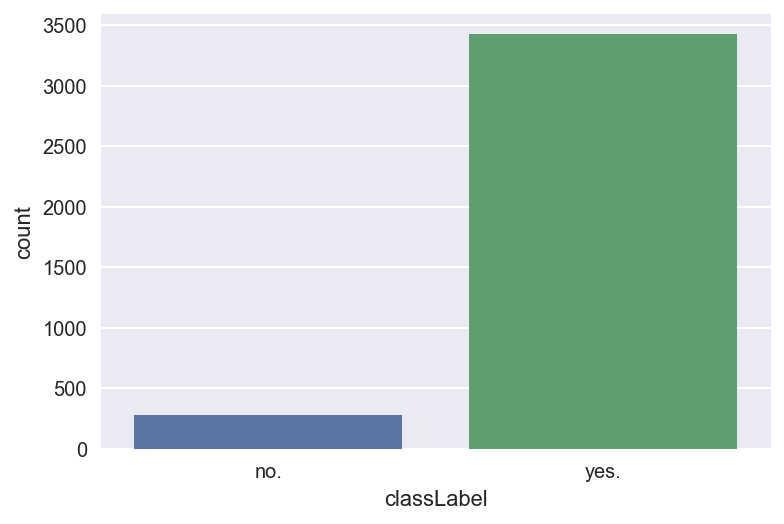

In [20]:
sns.countplot(x='classLabel', data=train_cp)

In general, for all categorical variables present in the training dataset we observe: 

In [21]:
print("Categorical features:")
for cat_var in ("v1", "v4", "v8", "v9", "v11", "v12", "v16", "classLabel"):
    print(train_cp[cat_var].value_counts())

Categorical features:
b    2382
a    1279
Name: v1, dtype: int64
u    3055
y     549
l      32
Name: v4, dtype: int64
t    3171
f     529
Name: v8, dtype: int64
t    2239
f    1461
Name: v9, dtype: int64
f    1924
t    1776
Name: v11, dtype: int64
g    3430
s     189
p      81
Name: v12, dtype: int64
t    1023
f     532
Name: v16, dtype: int64
yes.    3424
no.      276
Name: classLabel, dtype: int64


Let's conclude this first introductory part checking if there is some variable difference between __Train__ and __Validation__ sets:

In [22]:
train_cp.columns.difference(valid_cp.columns)

Index([], dtype='object')

In [23]:
train_cp.columns.intersection(valid_cp.columns)

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'classLabel'],
      dtype='object')

There is no difference between the number and names of variables in Train and Validation

## 3. Data visualization: discovering and gaining insights

Visualising the data is an important step of the data analysis. With a graphical visualisation of the data we have a better understanding of the various features values distribution: for example we can understand what's the average of a certain variable or the distribution shape of another one feature etc...

We could of course limit our inspection to the table visualisation, but we could miss important things that may affect our model precision.

### 3.1 Univariate visualization



#### 3.1.1 Histograms and density plots

Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the `hist()` method on the whole dataset, and it will plot a histogram for each numerical attribute. 

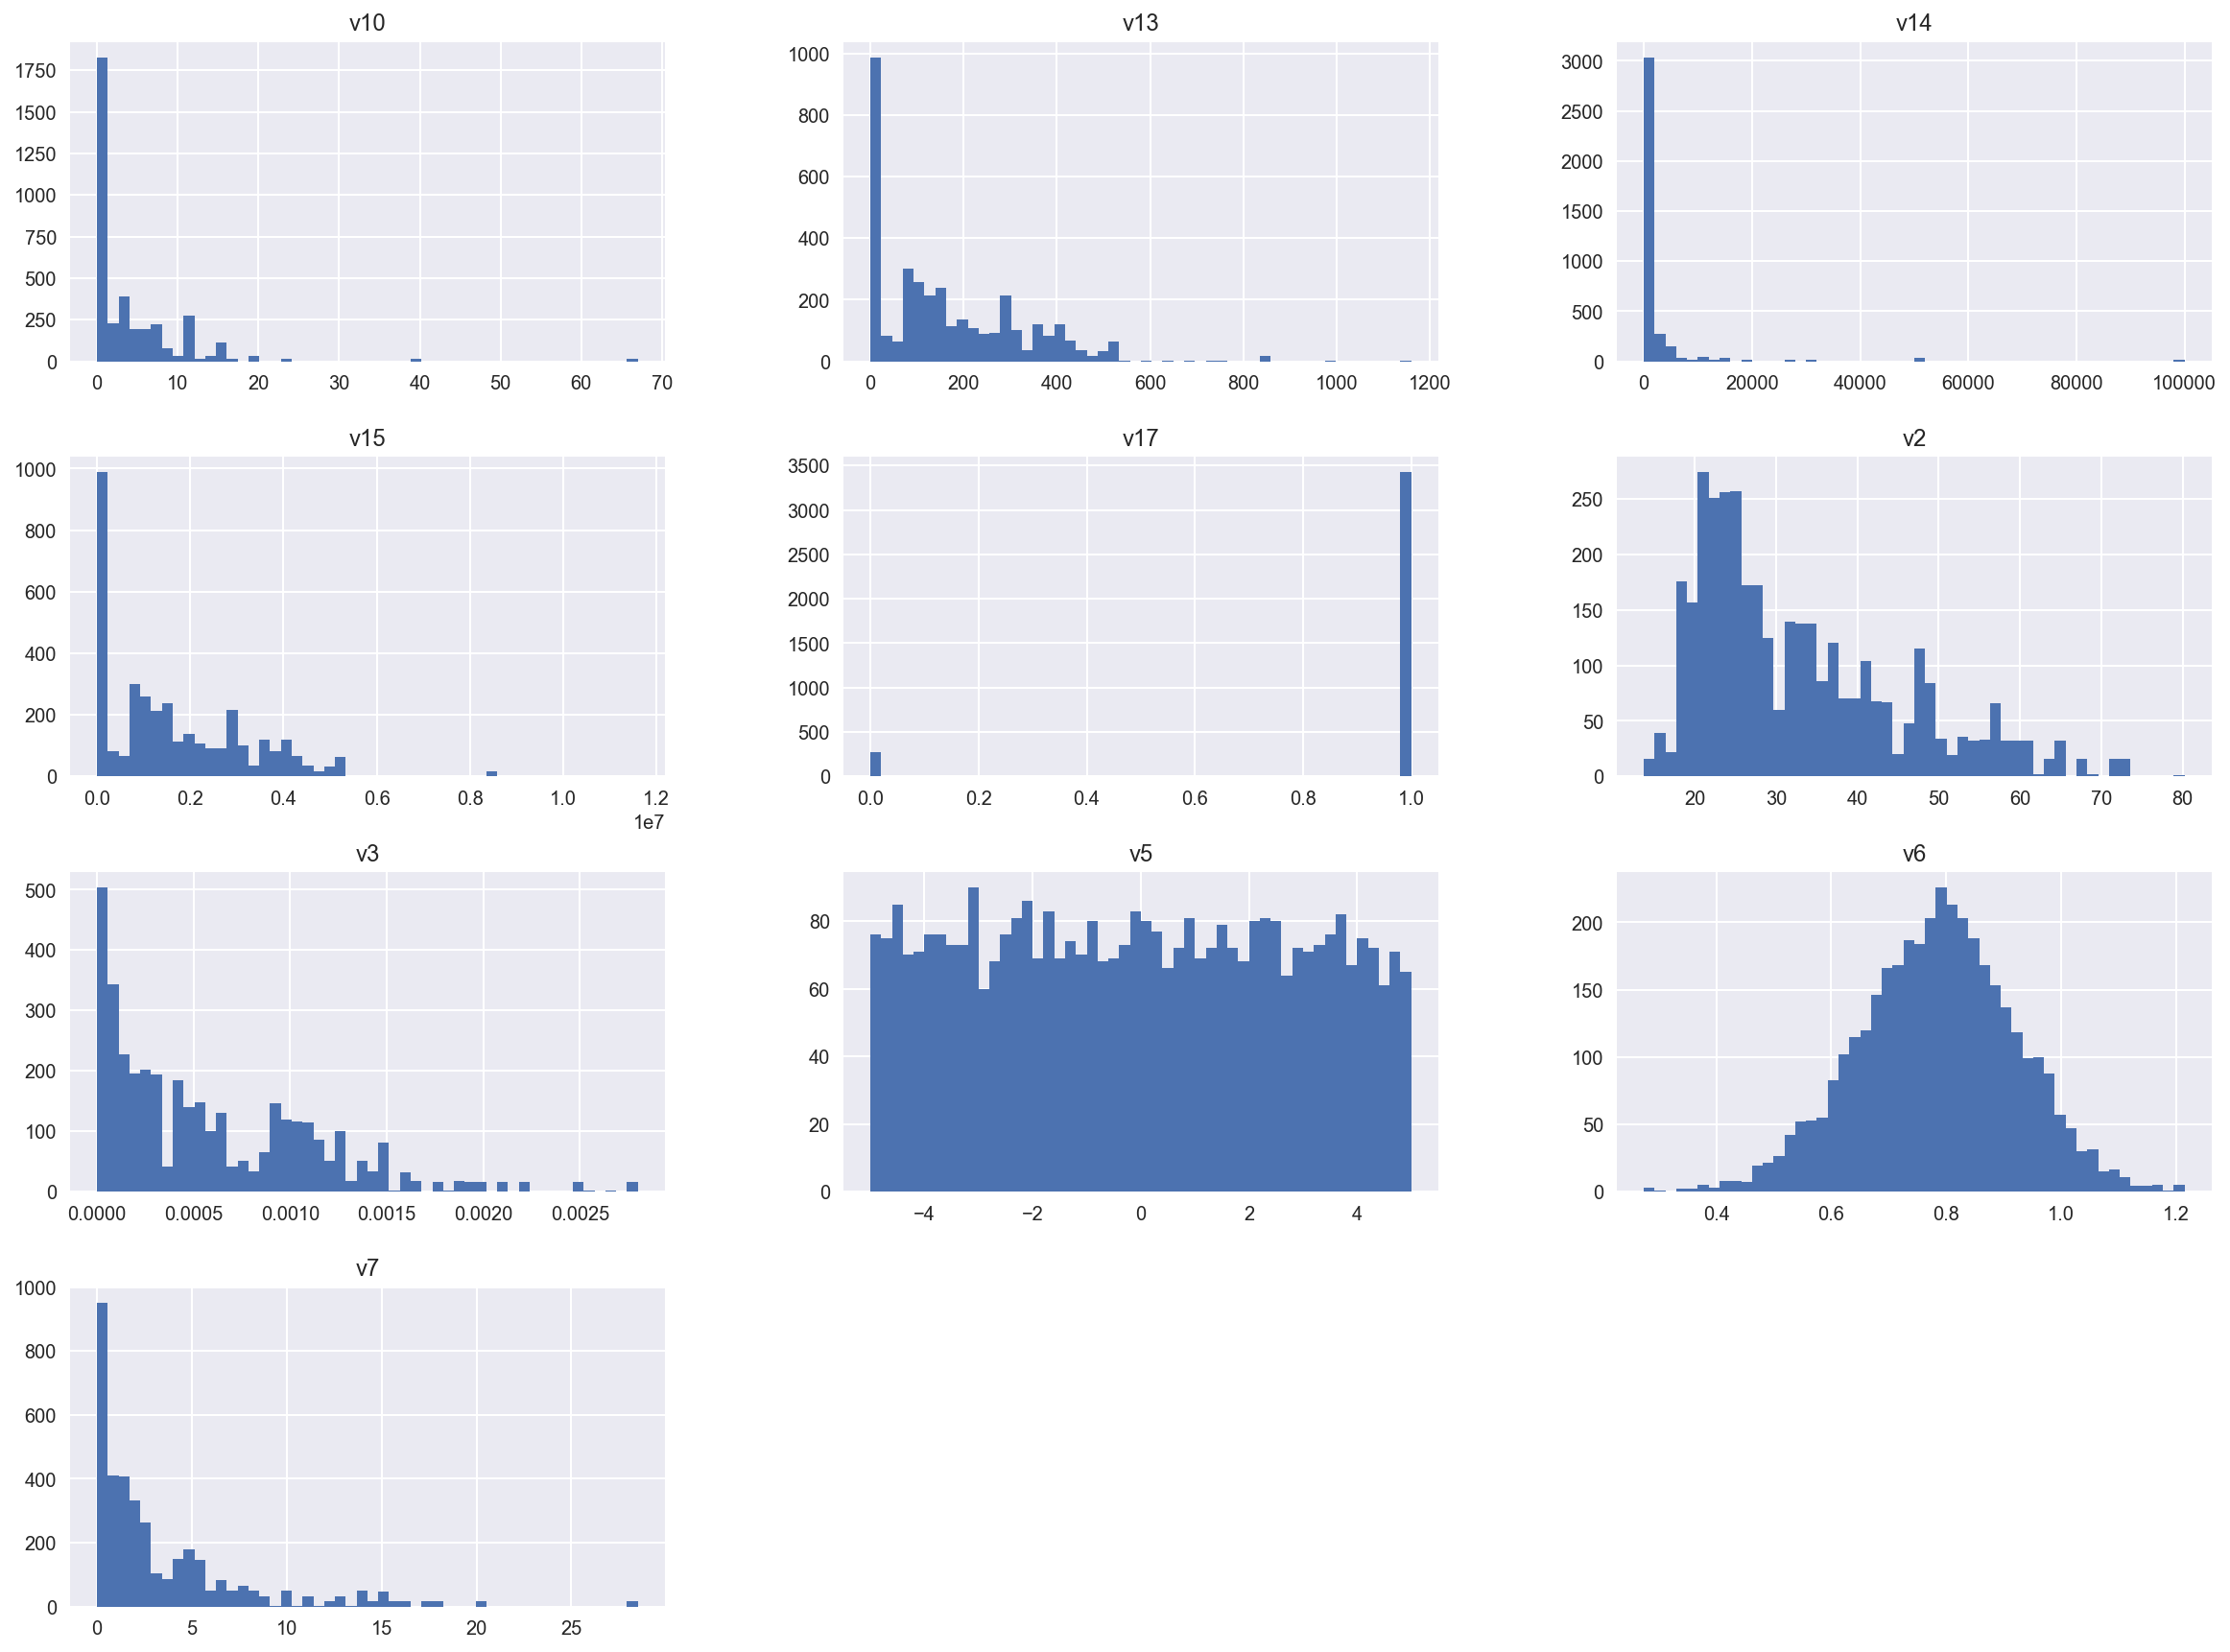

In [21]:
# We plot a histogram for each numerical attribute
# we saw above that in the initial traninig dataset 
# there are 10 numerical features.
train_cp.hist(bins=50, figsize=(20, 15))
plt.show()  

Alternatively we can also plot an estimated density of the distribution, like e.g. 

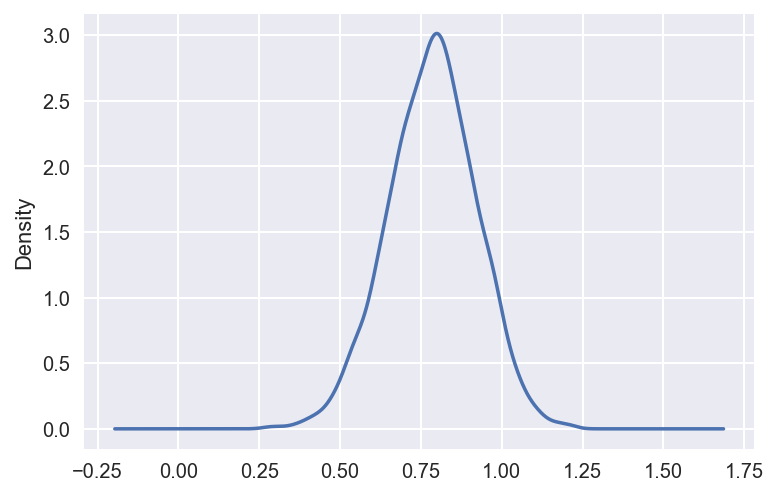

In [24]:
train_cp['v6'].plot.kde() # kernel density estimate

Notice a few things in these histograms: 

* From this quick glance at the data, we may see that some variables are correlated (e.g. `v13` and `v15`!);  
* These (numerical) attributes have different scales. We will discuss later in this notebook when we explore feature scaling;   
* Many histograms are *tail heavy*: they extend much farther to the right of the median than to the left (they are *skewed right*, like e.g. `v2`, `v3`, `v7`). This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions (e.g. `v6`);
* Connected to the above point, in some features we expect to observe outliers!

#### Box plot

Another useful type of visualization is a _box plot_: they help us to understand the distributions.

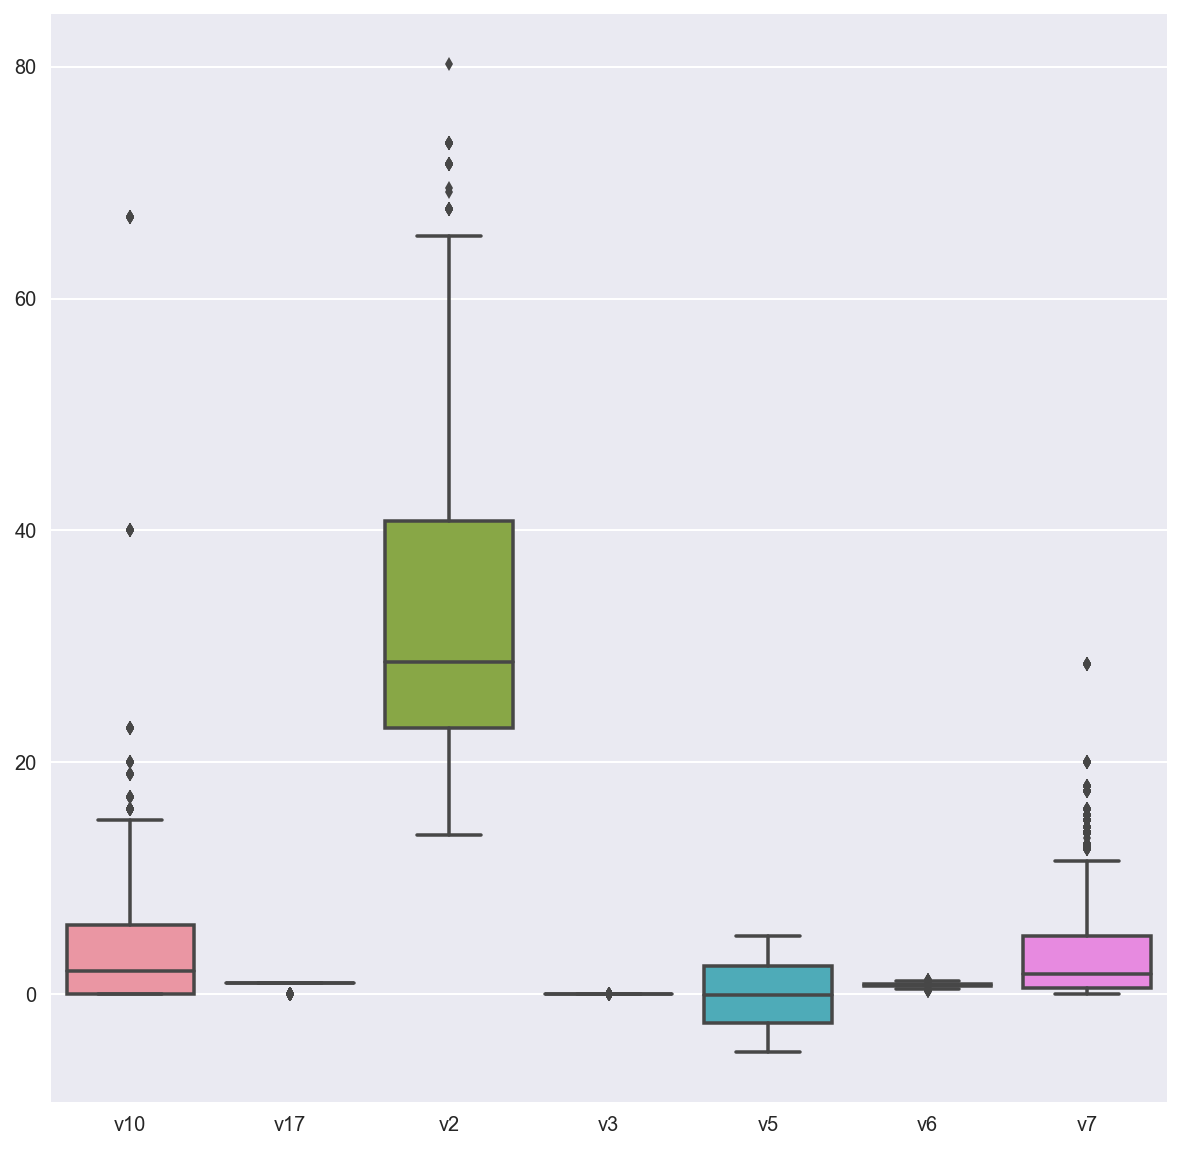

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
num_for_box = ['v10', 'v17', 'v2', 'v3', 'v5', 'v6', 'v7'] # slicing the dataframe in correspondece of desired columns
sns.boxplot(data=train_cp[num_for_box], ax = ax)
# we treat the vars v13, v14, and v15 separately, since theirs different scales

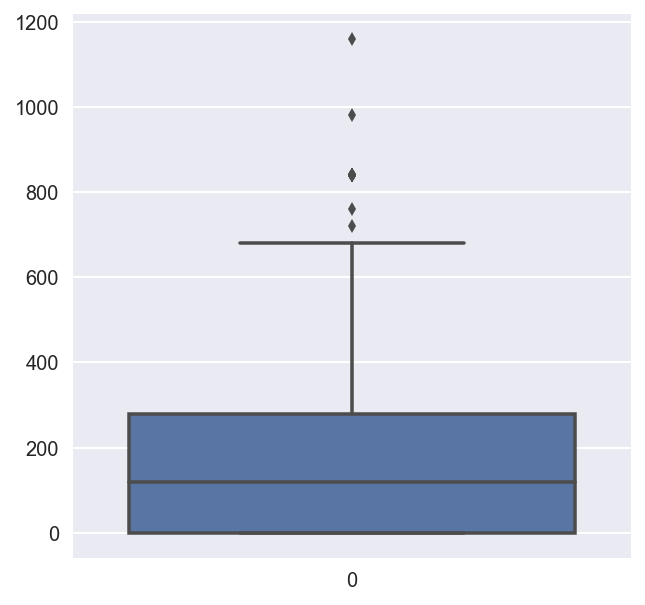

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=train_cp['v13'], ax = ax)

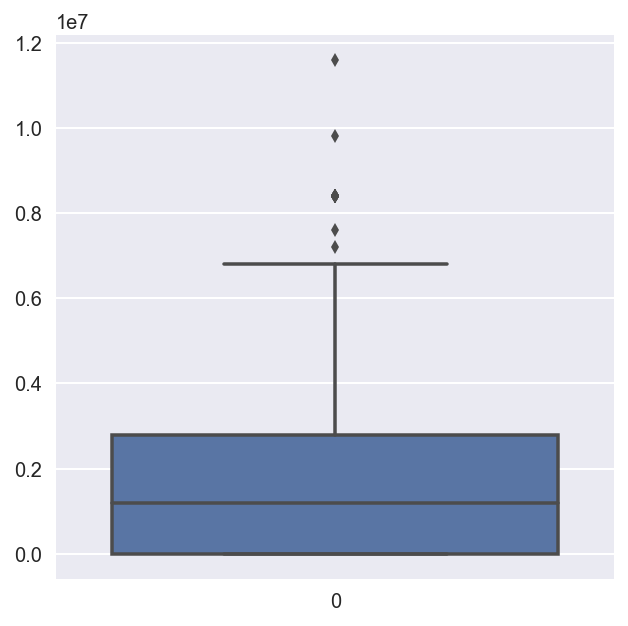

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=train_copy['v15'], ax = ax)

It seem that the two variables `v13` and `v15` have a quite "similar distribution", but with a different scale!!!

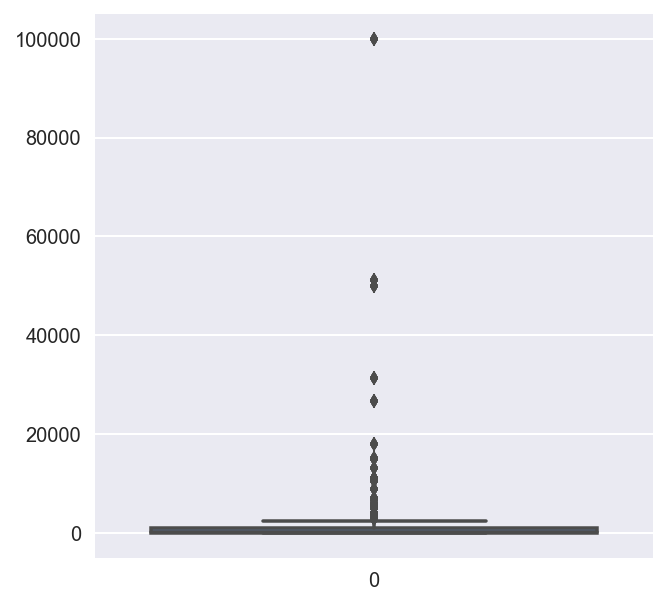

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=train_cp['v14'], ax = ax)

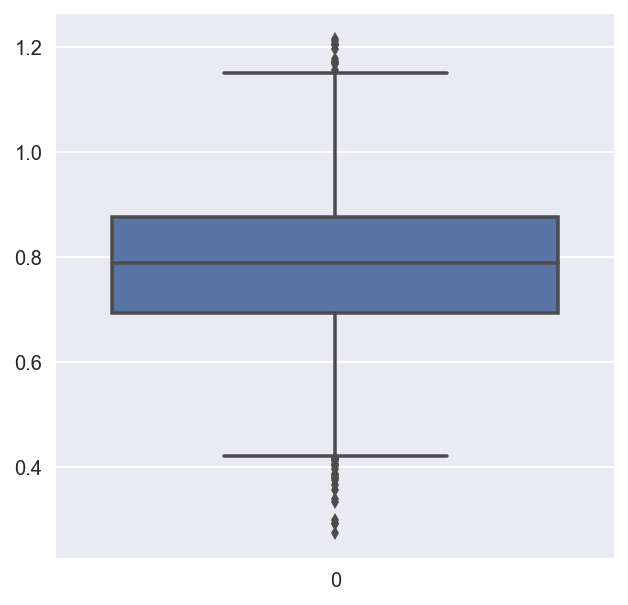

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=train_cp['v6'], ax = ax)

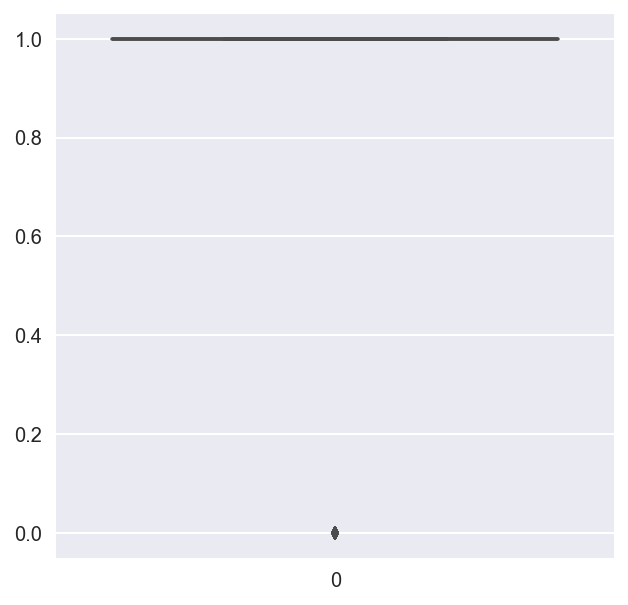

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=train_cp['v17'], ax = ax)

The `v17` attribute is just a binary variable: 1 or 0 !

Let's see how to interpret a box plot.  
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. Its component are a *box*, the so-called *whiskers*, and a number of individual points (*outliers*). The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25*th* (Q1) and 75*th* (Q3) percentiles (the interquartile range or IQR = Q3 - Q1). The horizontal line inside the box marks the median (50$%$) of the distribution.  
The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1 - 1.5 x IQR, Q3 + 1.5 x IQR).  
Not uncommonly real datasets will display surprisingly high maximums or surprisingly low minimums called outliers. John Tukey has provided a precise definition for two types of outliers:  

* Outliers are either 3 x IQR or more above the third quartile or 3 x IQR or more below the first quartile.

* Suspected outliers are are slightly more central versions of outliers: either 1.5 x IQR or more above the third quartile or 1.5 x IQR or more below the first quartile.

## 4. Data cleaning and transformation

It is not uncommon in real-world applications that our samples are missing one or more values for various reasons.   __Missing values__ are representative of the *messiness* of real world data. There can be a multitude of reasons why they occur — ranging from human errors during data entry, incorrect sensor readings, to software bugs in the data processing pipeline.  

Missing data are probably the most widespread source of errors in our code, and the reason for most of the exception-handling. In general, if we try to remove them, we might reduce the amount of data we have available dramatically — probably the worst that can happen in machine learning.  

Still, often there are hidden patterns in missing data points. Those patterns can provide additional insight in the problem we’re trying to solve. We can treat missing values in data the same way as silence in music — on the surface they might be considered negative (not contributing any information), but inside lies a lot of potential.    

We typically see missing values as the blank spaces in our data table or as placeholder strings such as `NaN` (Not A Number). The first thing one should do is count how many we have and try to visualize their distributions. For this step to work properly one should manually inspect the data (or at least a subset of it) to try to determine how they are designated. Possible variations are: `‘NaN’`, `‘NA’`, `‘None’`, `‘ ’`, `‘?’` and others. If we have something different than `‘NaN’` one should standardize them by using `np.nan`.  
  
For a larger DataFrame , it can be tedious to look for missing values manually; in this case, we can use the `isnull()` method to return a DataFrame with Boolean values that indicate whether a cell contains a value ( False ) or if data is missing ( True ). Using the `sum()` method, we can then return the number of missing values per column as follows:

In [30]:
# Checking for missing values in the training set 
null_columns = train_cp.columns[train_cp.isnull().any()]
print("Number of missing values in the training set:")
print(train_cp[null_columns].isnull().sum())

Number of missing values in the training set:
v1       39
v2       39
v4       64
v13     100
v15     100
v16    2145
dtype: int64


In [31]:
# Checking for missing values in the validation set 
null_columns = valid_cp.columns[valid_cp.isnull().any()]
print("Number of missing values in the validation set:")
print(valid_cp[null_columns].isnull().sum())

Number of missing values in the validation set:
v1       3
v2       3
v4       2
v13      3
v15      3
v16    111
dtype: int64


In [32]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame.
    ---------
    Args: 
        param (object) series: Pandas DataFrame object
    ---------
    Returns:    
        float: the percentage
    """
    num = series.isnull().sum() # numerator
    den = len(series) # denominator
    return round(num/den, 2) # round to the second decimal

# Only include columns that contain any NaN values
df_with_any_null_values = train_cp[train_cp.columns[train_cp.isnull().any()].tolist()]

print(df_with_any_null_values.dtypes)
get_percentage_missing(df_with_any_null_values)

v1      object
v2     float64
v4      object
v13    float64
v15    float64
v16     object
dtype: object


v1     0.01
v2     0.01
v4     0.02
v13    0.03
v15    0.03
v16    0.58
dtype: float64

To construct our *null-visualizations* we will use the handy `missingno` package, a python package missing data visualization tool built with matplotlib and which takes any pandas `DataFrame` thrown at it.  

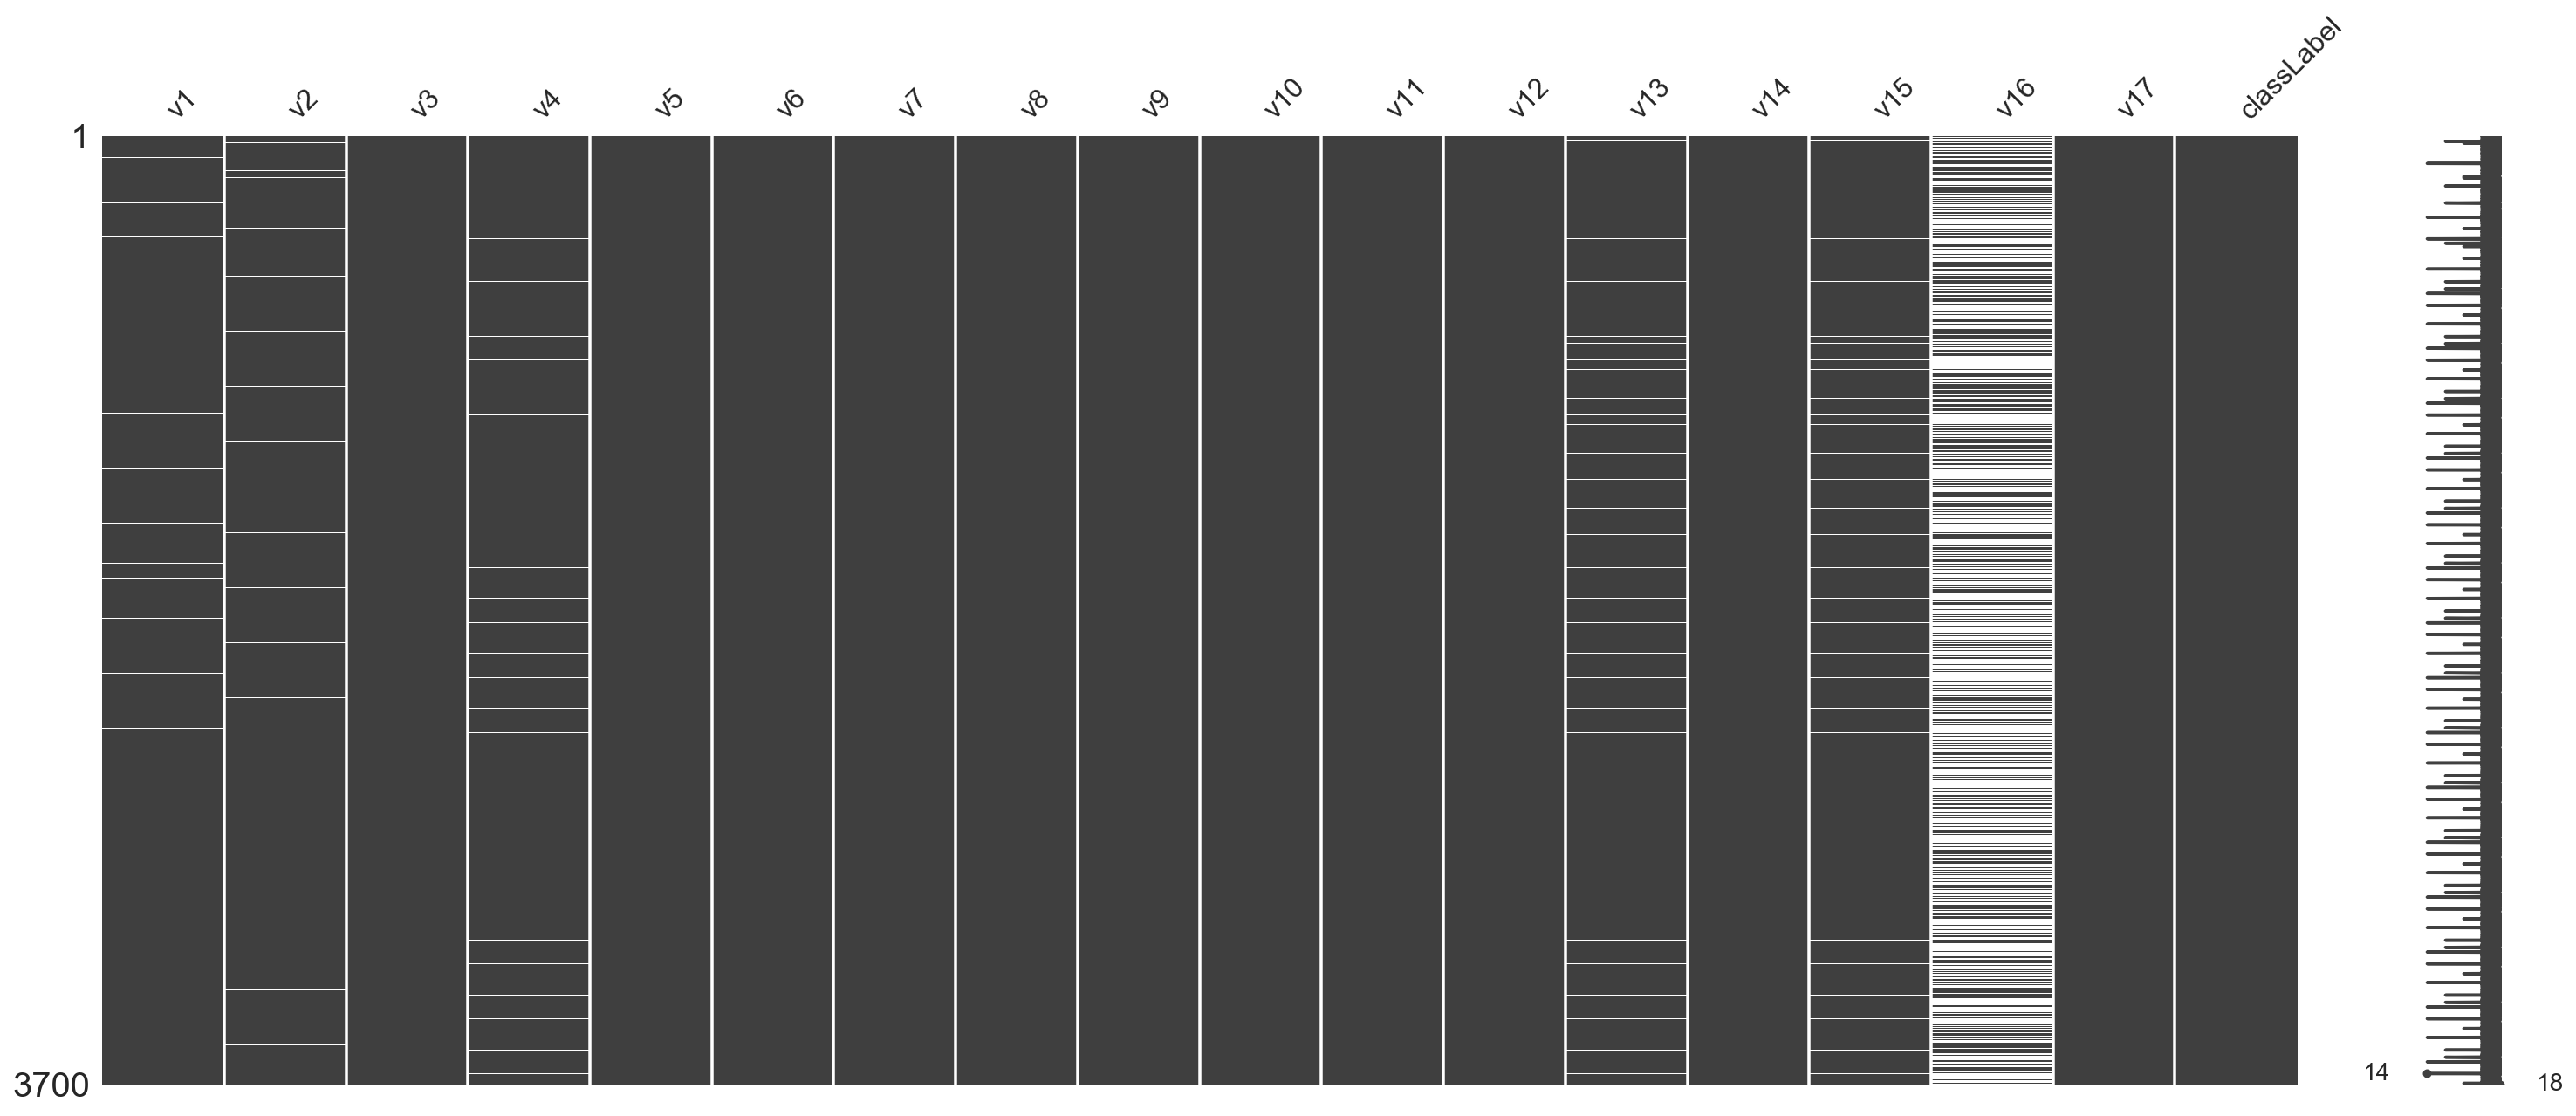

In [33]:
#fig, ax = plt.subplots(figsize=(10,10))
import missingno as msno
msno.matrix(train_cp) # the missing value matrix

The nullity matrix gives us a data-dense display which lets us quickly visually pick out the missing data patterns in the dataset. Also, the *sparkline* on the right gives us a summary of the general shape of the data completeness and an indicator of the rows with maximum and minimum rows.  
Finally, a simple correlation heatmap is shown below. This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from -1 to 1 (-1 $\leq$ R $\leq$ 1). Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 $<$ R $<$ 0.05), no value will be displayed. Also, a perfect positive nullity correlation (R = 1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R = -1) means that one of the features is missing and the second is not missing.

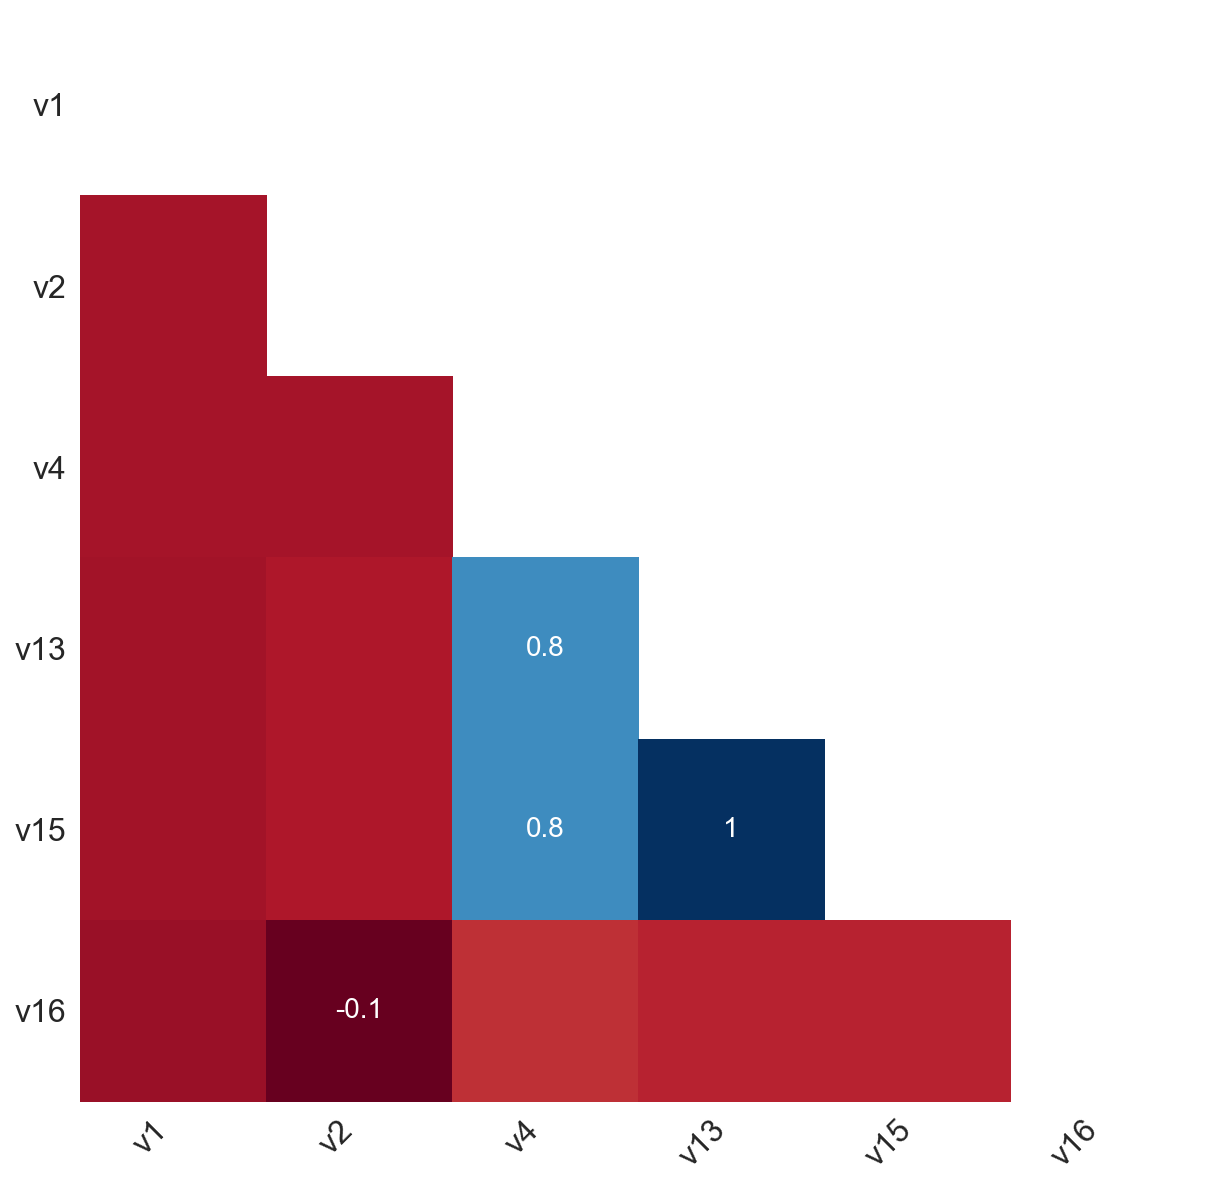

In [35]:
missingdata_df = train_cp.columns[train_cp.isnull().any()].tolist()
msno.heatmap(train_cp[missingdata_df], figsize=(10,10))

### 4.1 Handling Missing Data with Pandas methods

One of the easiest ways to deal with missing data is to simply remove the corresponding features (columns) or samples (rows) from the dataset entirely.  
Although the removal of missing data seems to be a convenient approach, it also comes with certain disadvantages; for example, we may end up removing too many samples, which will make a reliable analysis impossible. Or, if we remove too many feature columns, we will run the risk of losing valuable information that our classifier needs to discriminate between classes. We will thus look at one of the most commonly used alternatives for dealing with missing values: *interpolation techniques*. We may consider to set the values to some value (zero, the mean, the median, etc.).  

In Pandas: 
* Option 1: Rows with missing values can be easily dropped via the `dropna()` method, e.g. :  
 
     `train.copy.dropna(subset=["v1"]) # (e.g. v1 has 1% NaN)`   
     

* Option 2: Alternatively, we can get rid of the entire attribute, by using the `drop()` method, e.g.:  

    `train.copy.drop(subset=["v16"], axis=1) # (e.g. v16 has ~60% NaN)` 
 

* Option 3: One of the most common interpolation techniques is *median imputation*, where we simply replace the missing value by the median value of the entire feature column, e.g. :   
    
    `median = train.copy["v2"].median()`  
    `train.copy["v2"].fillna(median, inplace=True) # (e.g. v2 has 1% NaN)` 

Let's create a few functions to take care of the missing features

In [38]:
# Write a function that imputes the median
def imput_median(series):
    """Calculates the median value of a column in DataFrame, and 
    then replace the NaNs with this value.
    --------
    Args: 
        param (object) series: Pandas DataFrame object
    --------    
    Returns:    
        object: a Pandas DataFrame with the (numeric) features NaNs replaced by the median
    """
    return series.fillna(series.median())

In [44]:
train_median = imput_median(train_cp) # a dataframe with the "numeric" NaNs replaced by the median values

In [45]:
train_median.head() # a quick check

v1     v2        v3 v4        v5        v6     v7 v8 v9  v10 v11 v12    v13  \
0  a  17.92  0.000054  u -0.840182  0.522883  1.750  f  t    1   t   g   80.0   
1  b  16.92  0.000034  y -2.159635  0.774187  0.290  f  f    0   f   s  200.0   
2  b  31.25  0.000112  u  1.750687  0.760363  0.000  f  t    1   f   g   96.0   
3  a  48.17  0.000133  u  4.174871  0.888963  0.335  f  f    0   f   g    0.0   
4  b  32.33  0.000350  u -3.785479  0.489024  0.500  f  f    0   t   g  232.0   

   v14        v15  v16  v17 classLabel  
0    5   800000.0    t    0        no.  
1    0  2000000.0  NaN    0        no.  
2   19   960000.0    t    0        no.  
3  120        0.0  NaN    0        no.  
4    0  2320000.0    f    0        no.

In [46]:
train_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 18 columns):
v1            3661 non-null object
v2            3700 non-null float64
v3            3700 non-null float64
v4            3636 non-null object
v5            3700 non-null float64
v6            3700 non-null float64
v7            3700 non-null float64
v8            3700 non-null object
v9            3700 non-null object
v10           3700 non-null int64
v11           3700 non-null object
v12           3700 non-null object
v13           3700 non-null float64
v14           3700 non-null int64
v15           3700 non-null float64
v16           1555 non-null object
v17           3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(7), int64(3), object(8)
memory usage: 520.4+ KB


In [47]:
# Only include columns that contain any NaN values
df_with_any_null_values = train_median[train_median.columns[train_median.isnull().any()].tolist()]

print(df_with_any_null_values.dtypes)
get_percentage_missing(df_with_any_null_values)

v1     object
v4     object
v16    object
dtype: object


v1     0.01
v4     0.02
v16    0.58
dtype: float64

Only text attributes with missing values left!!!

In [66]:
# Write a function that imputes the most frequent category 
def imput_mostfrequent(series):
    """Find the most frequent categorical variable of a column in DataFrame, and 
    then replace the NaNs with this value.
    --------
    Args: 
        param (object) series: Pandas DataFrame object
    --------
    Returns:    
        object: a Pandas DataFrame with the (categorical) features NaNs replaced by the most frequent
    """
    
    cat = series.select_dtypes(include=['object', 'bool'])
    slice = cat[cat.columns[:-1]] # slicing on columns except the last one, the target variable
    for col in slice.columns:
        print("the most frequent in column {0:s} is {1:s}".format(col, slice[col].value_counts().index[0]))
        df = series.fillna(slice[col].value_counts().index[0])   
    return df    

In [67]:
train_median_freq = imput_mostfrequent(train_median) # remember: we have already taken care of the numeric NaNs! 

the most frequent in column v1 is b
the most frequent in column v4 is u
the most frequent in column v8 is t
the most frequent in column v9 is t
the most frequent in column v11 is f
the most frequent in column v12 is g
the most frequent in column v16 is t


In [68]:
train_median_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 18 columns):
v1            3700 non-null object
v2            3700 non-null float64
v3            3700 non-null float64
v4            3700 non-null object
v5            3700 non-null float64
v6            3700 non-null float64
v7            3700 non-null float64
v8            3700 non-null object
v9            3700 non-null object
v10           3700 non-null int64
v11           3700 non-null object
v12           3700 non-null object
v13           3700 non-null float64
v14           3700 non-null int64
v15           3700 non-null float64
v16           3700 non-null object
v17           3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(7), int64(3), object(8)
memory usage: 520.4+ KB


In [69]:
train_median_freq.describe()

v2           v3           v5           v6           v7  \
count  3700.000000  3700.000000  3700.000000  3700.000000  3700.000000   
mean     32.776962     0.000585    -0.053318     0.784188     3.439496   
std      12.606362     0.000540     2.871240     0.136514     4.335229   
min      13.750000     0.000000    -4.996939     0.273945     0.000000   
25%      23.000000     0.000150    -2.516349     0.693130     0.500000   
50%      28.670000     0.000425    -0.052786     0.787842     1.750000   
75%      40.000000     0.000963     2.406251     0.876052     5.000000   
max      80.250000     0.002800     4.999274     1.215066    28.500000   

               v10          v13            v14           v15          v17  
count  3700.000000  3700.000000    3700.000000  3.700000e+03  3700.000000  
mean      4.160000   161.541081    2246.705946  1.615411e+06     0.925405  
std       6.750553   154.077610    8708.571126  1.540776e+06     0.262772  
min       0.000000     0.000000       0.000000  0.000000e+00     0.000000  
25%       0.000000     0.000000       0.000000  0.000000e+00     1.000000  
50%       2.000000   120.000000     113.000000  1.200000e+06     1.000000  
75%       6.000000   274.000000    1059.750000  2.740000e+06     1.000000  
max      67.000000  1160.000000  100000.000000  1.160000e+07     1.000000

In [71]:
train_median_freq.describe(include=['object', 'bool'])

v1    v4    v8    v9   v11   v12   v16 classLabel
count   3700  3700  3700  3700  3700  3700  3700       3700
unique     3     4     2     2     2     3     2          2
top        b     u     t     t     f     g     t       yes.
freq    2382  3055  3171  2239  1924  3430  3168       3424

In [72]:
train_median_freq['v4'].value_counts()

u    3055
y     549
t      64
l      32
Name: v4, dtype: int64

### 4.2 Multivariate Visualizations

#### 4.2.1 Looking for correlations

The _correlation matrix_ is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two attributes. Let's calculate the correlation matrix for our dataset.

In [73]:
corr_matrix = train_median_freq.corr()

In [74]:
corr_matrix

v2        v3        v5        v6        v7       v10       v13  \
v2   1.000000  0.271666 -0.016767  0.025493  0.514231  0.209008 -0.151523   
v3   0.271666  1.000000 -0.010290  0.056937  0.343848  0.306006 -0.273774   
v5  -0.016767 -0.010290  1.000000 -0.020615 -0.003256 -0.006252  0.039309   
v6   0.025493  0.056937 -0.020615  1.000000  0.040617  0.059669  0.001563   
v7   0.514231  0.343848 -0.003256  0.040617  1.000000  0.304266 -0.211207   
v10  0.209008  0.306006 -0.006252  0.059669  0.304266  1.000000 -0.149786   
v13 -0.151523 -0.273774  0.039309  0.001563 -0.211207 -0.149786  1.000000   
v14 -0.008525  0.141222  0.014988  0.026872 -0.004123 -0.007082  0.152467   
v15 -0.151523 -0.273774  0.039309  0.001563 -0.211207 -0.149786  1.000000   
v17  0.062664  0.102007  0.005745  0.380637  0.141394  0.153039 -0.051580   

          v14       v15       v17  
v2  -0.008525 -0.151523  0.062664  
v3   0.141222 -0.273774  0.102007  
v5   0.014988  0.039309  0.005745  
v6   0.026872  0.001563  0.380637  
v7  -0.004123 -0.211207  0.141394  
v10 -0.007082 -0.149786  0.153039  
v13  0.152467  1.000000 -0.051580  
v14  1.000000  0.152467  0.066893  
v15  0.152467  1.000000 -0.051580  
v17  0.066893 -0.051580  1.000000

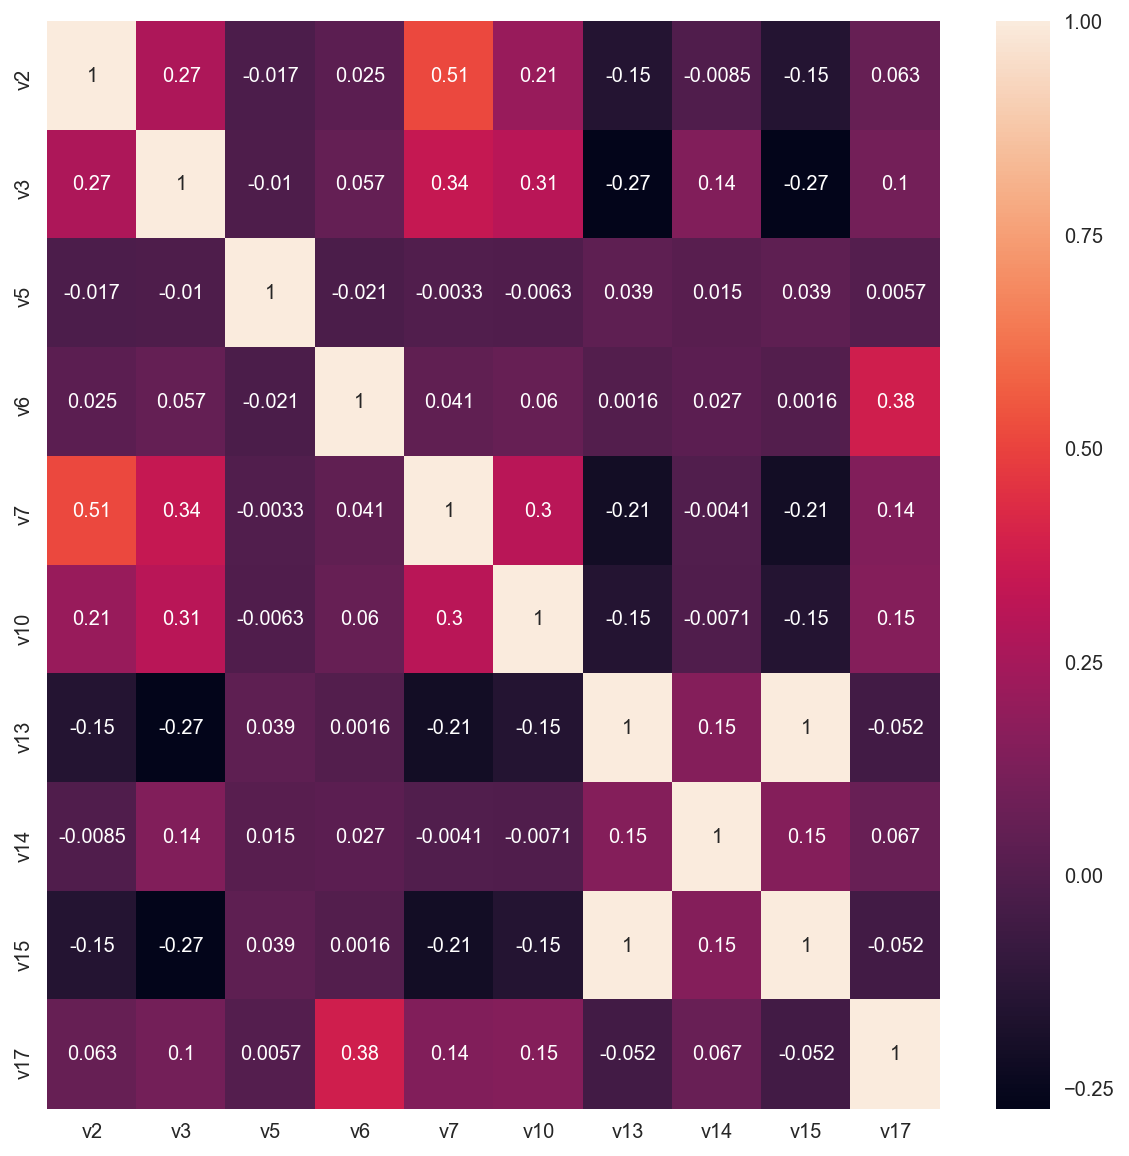

In [75]:
fig, ax = plt.subplots(figsize=(10,10)) # Sample figsize in inches
sns.heatmap(corr_matrix, annot = True, ax = ax)

Another way to check for correlation between attribute is to use Pandas' scatter_matrix function, which plots every numerical attribute against every other numerical attribute:

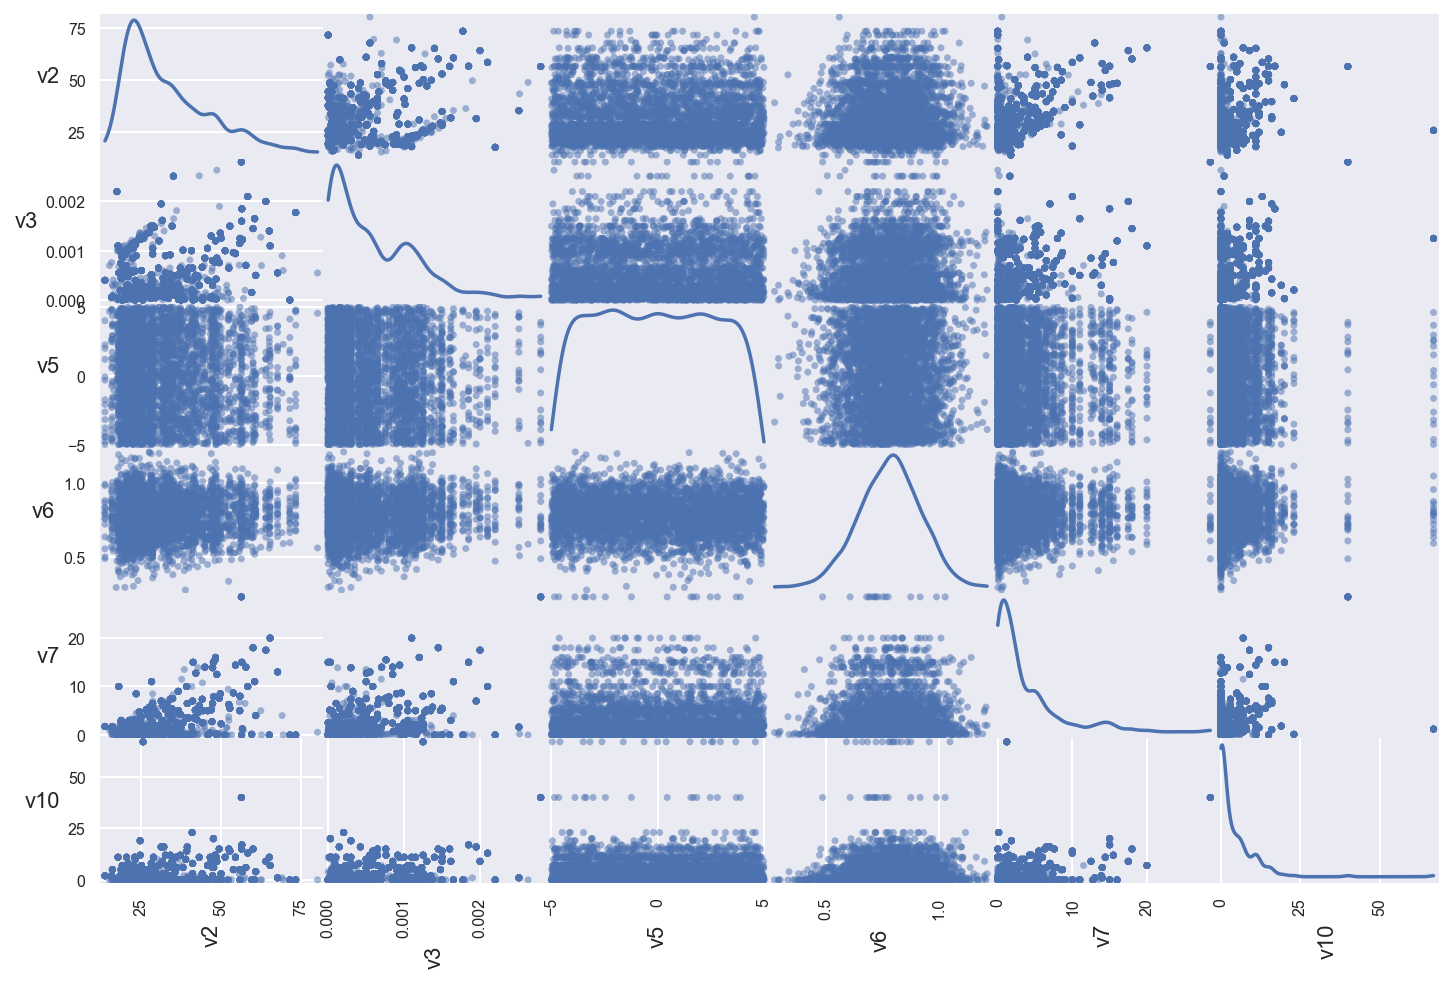

In [80]:
from pandas.tools.plotting import scatter_matrix
attributes = ["v2", "v3", "v5", "v6", "v7", "v10"]  # a sampled dataset
axs = scatter_matrix(train_median_freq[attributes], 
                     figsize=(12,8), diagonal='kde') # kernel density
# Rotate axis labels and remove axis ticks
n = len(train_median_freq[attributes].columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    # v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    # h.set_xticks(())

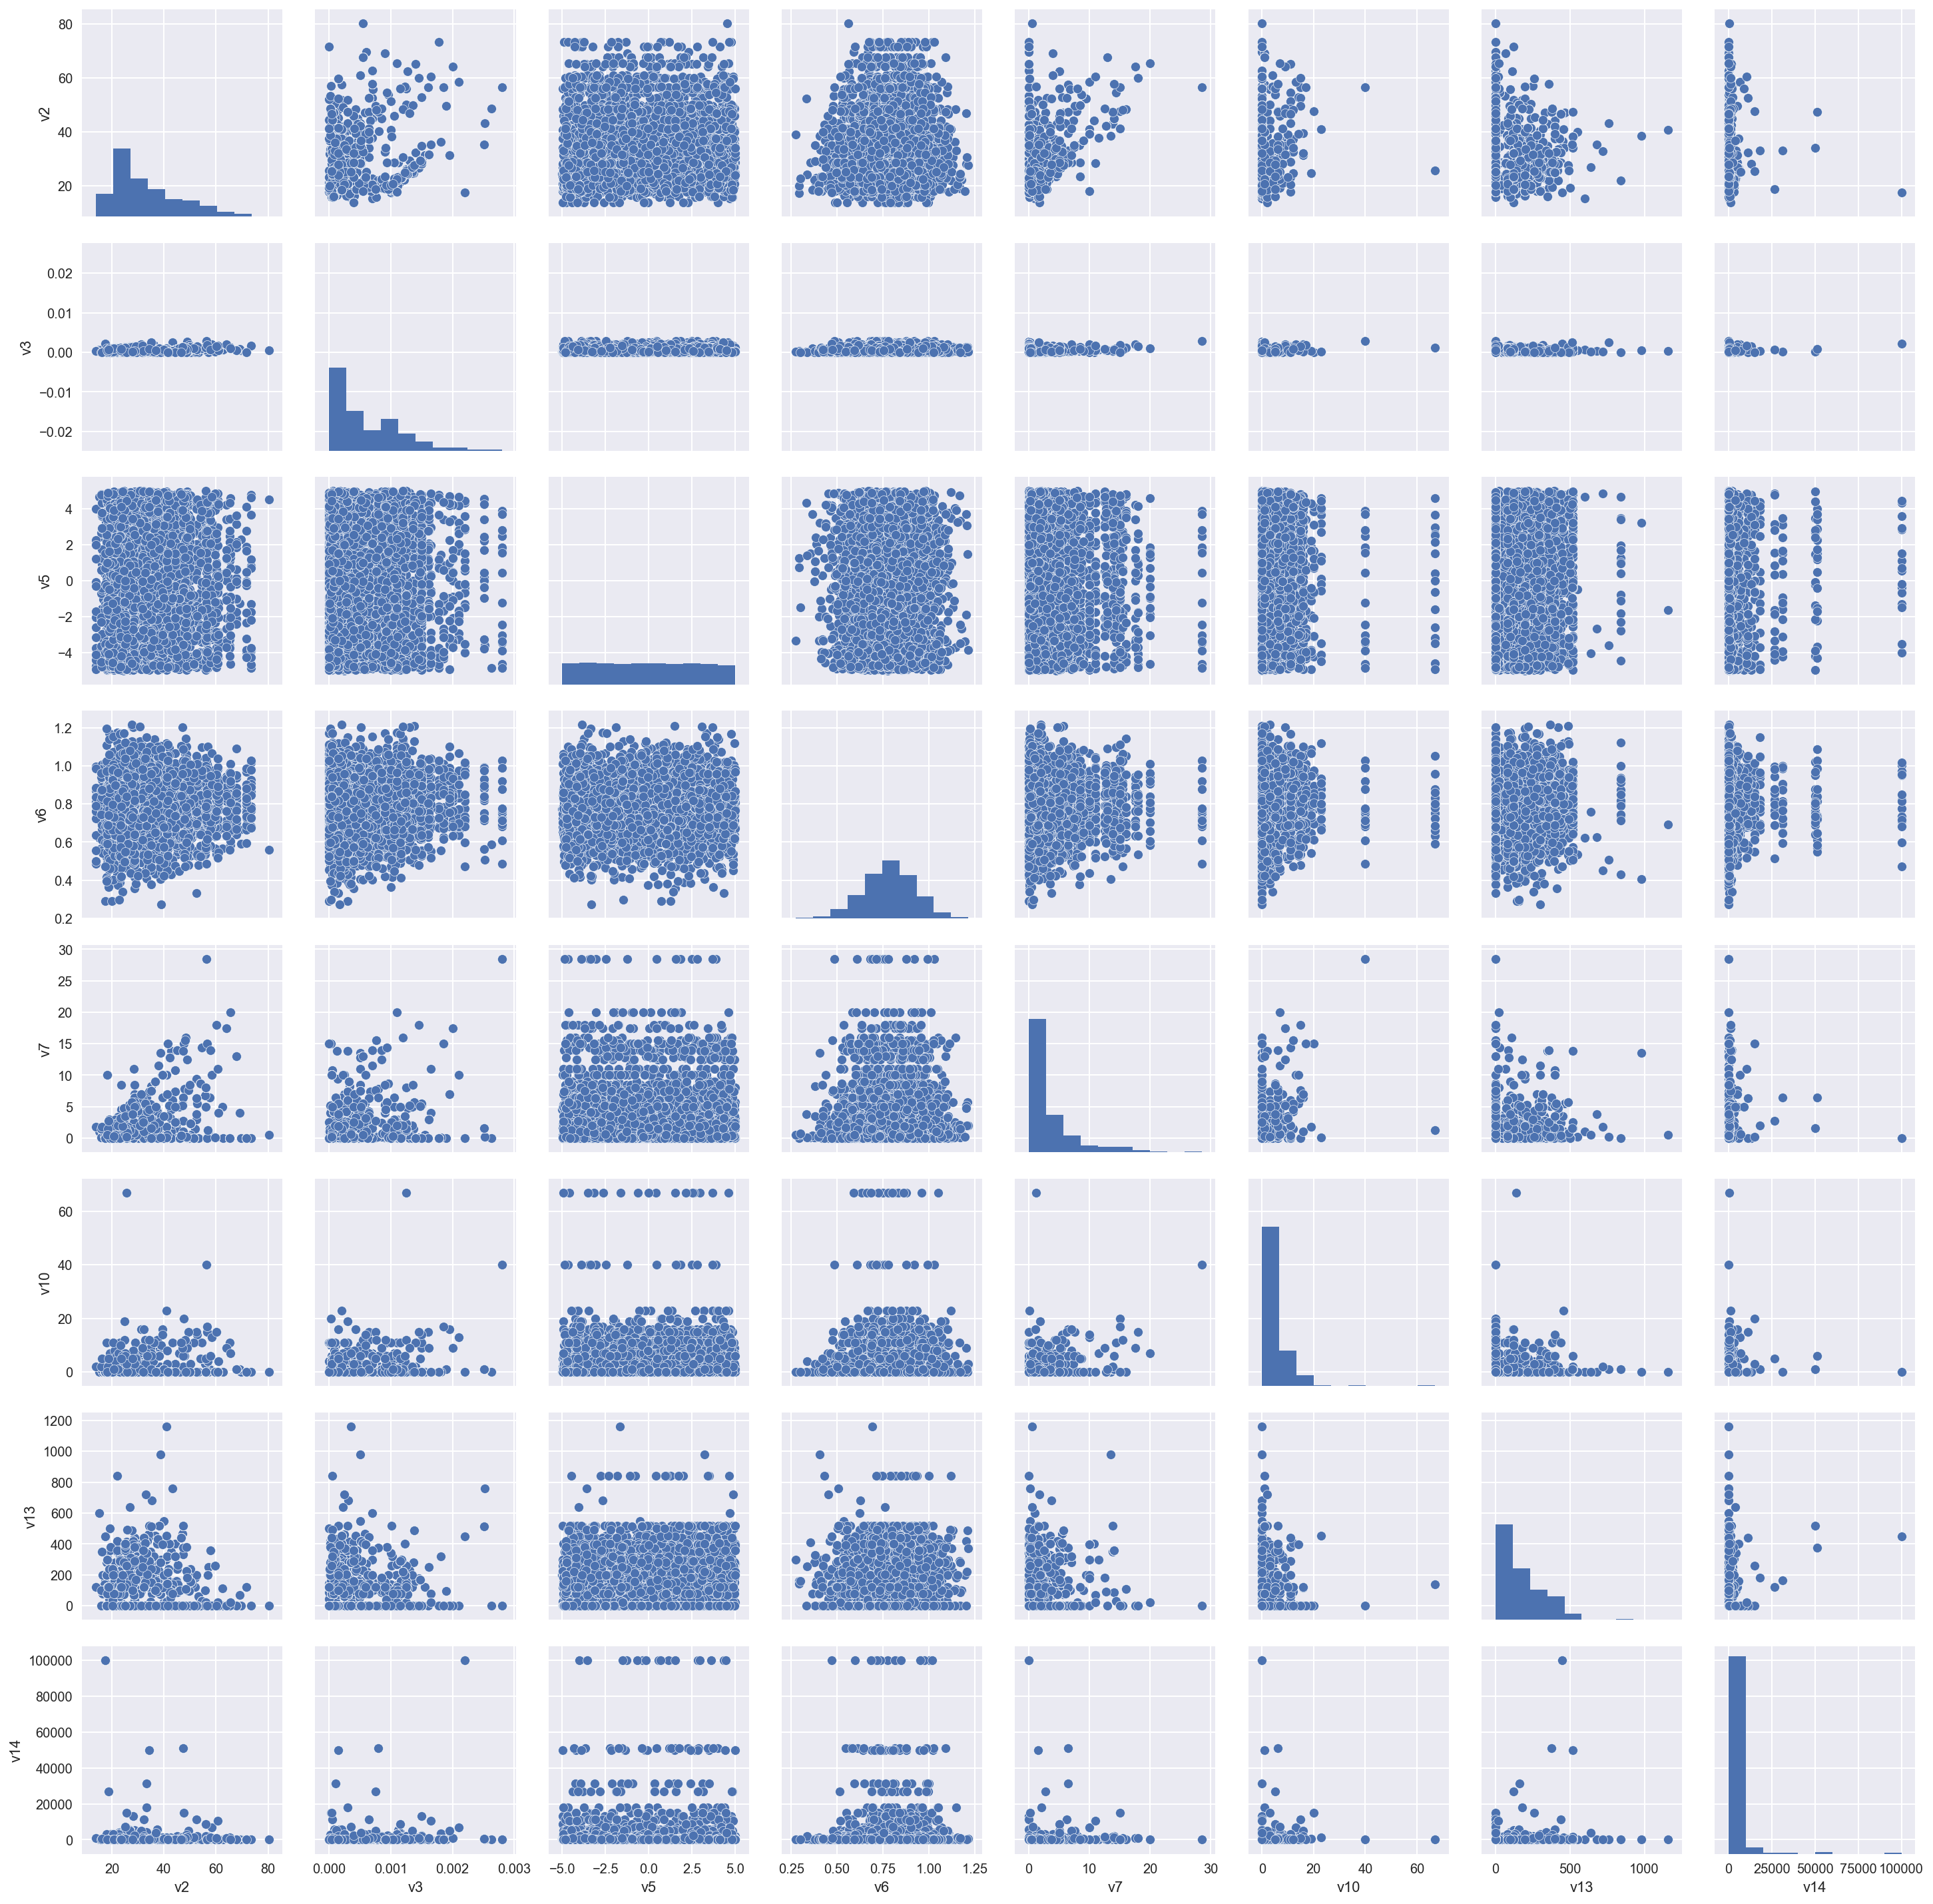

In [180]:
sns.pairplot(train_median_freq[attributes]) # with seaborn ... a bit clearer :-)  

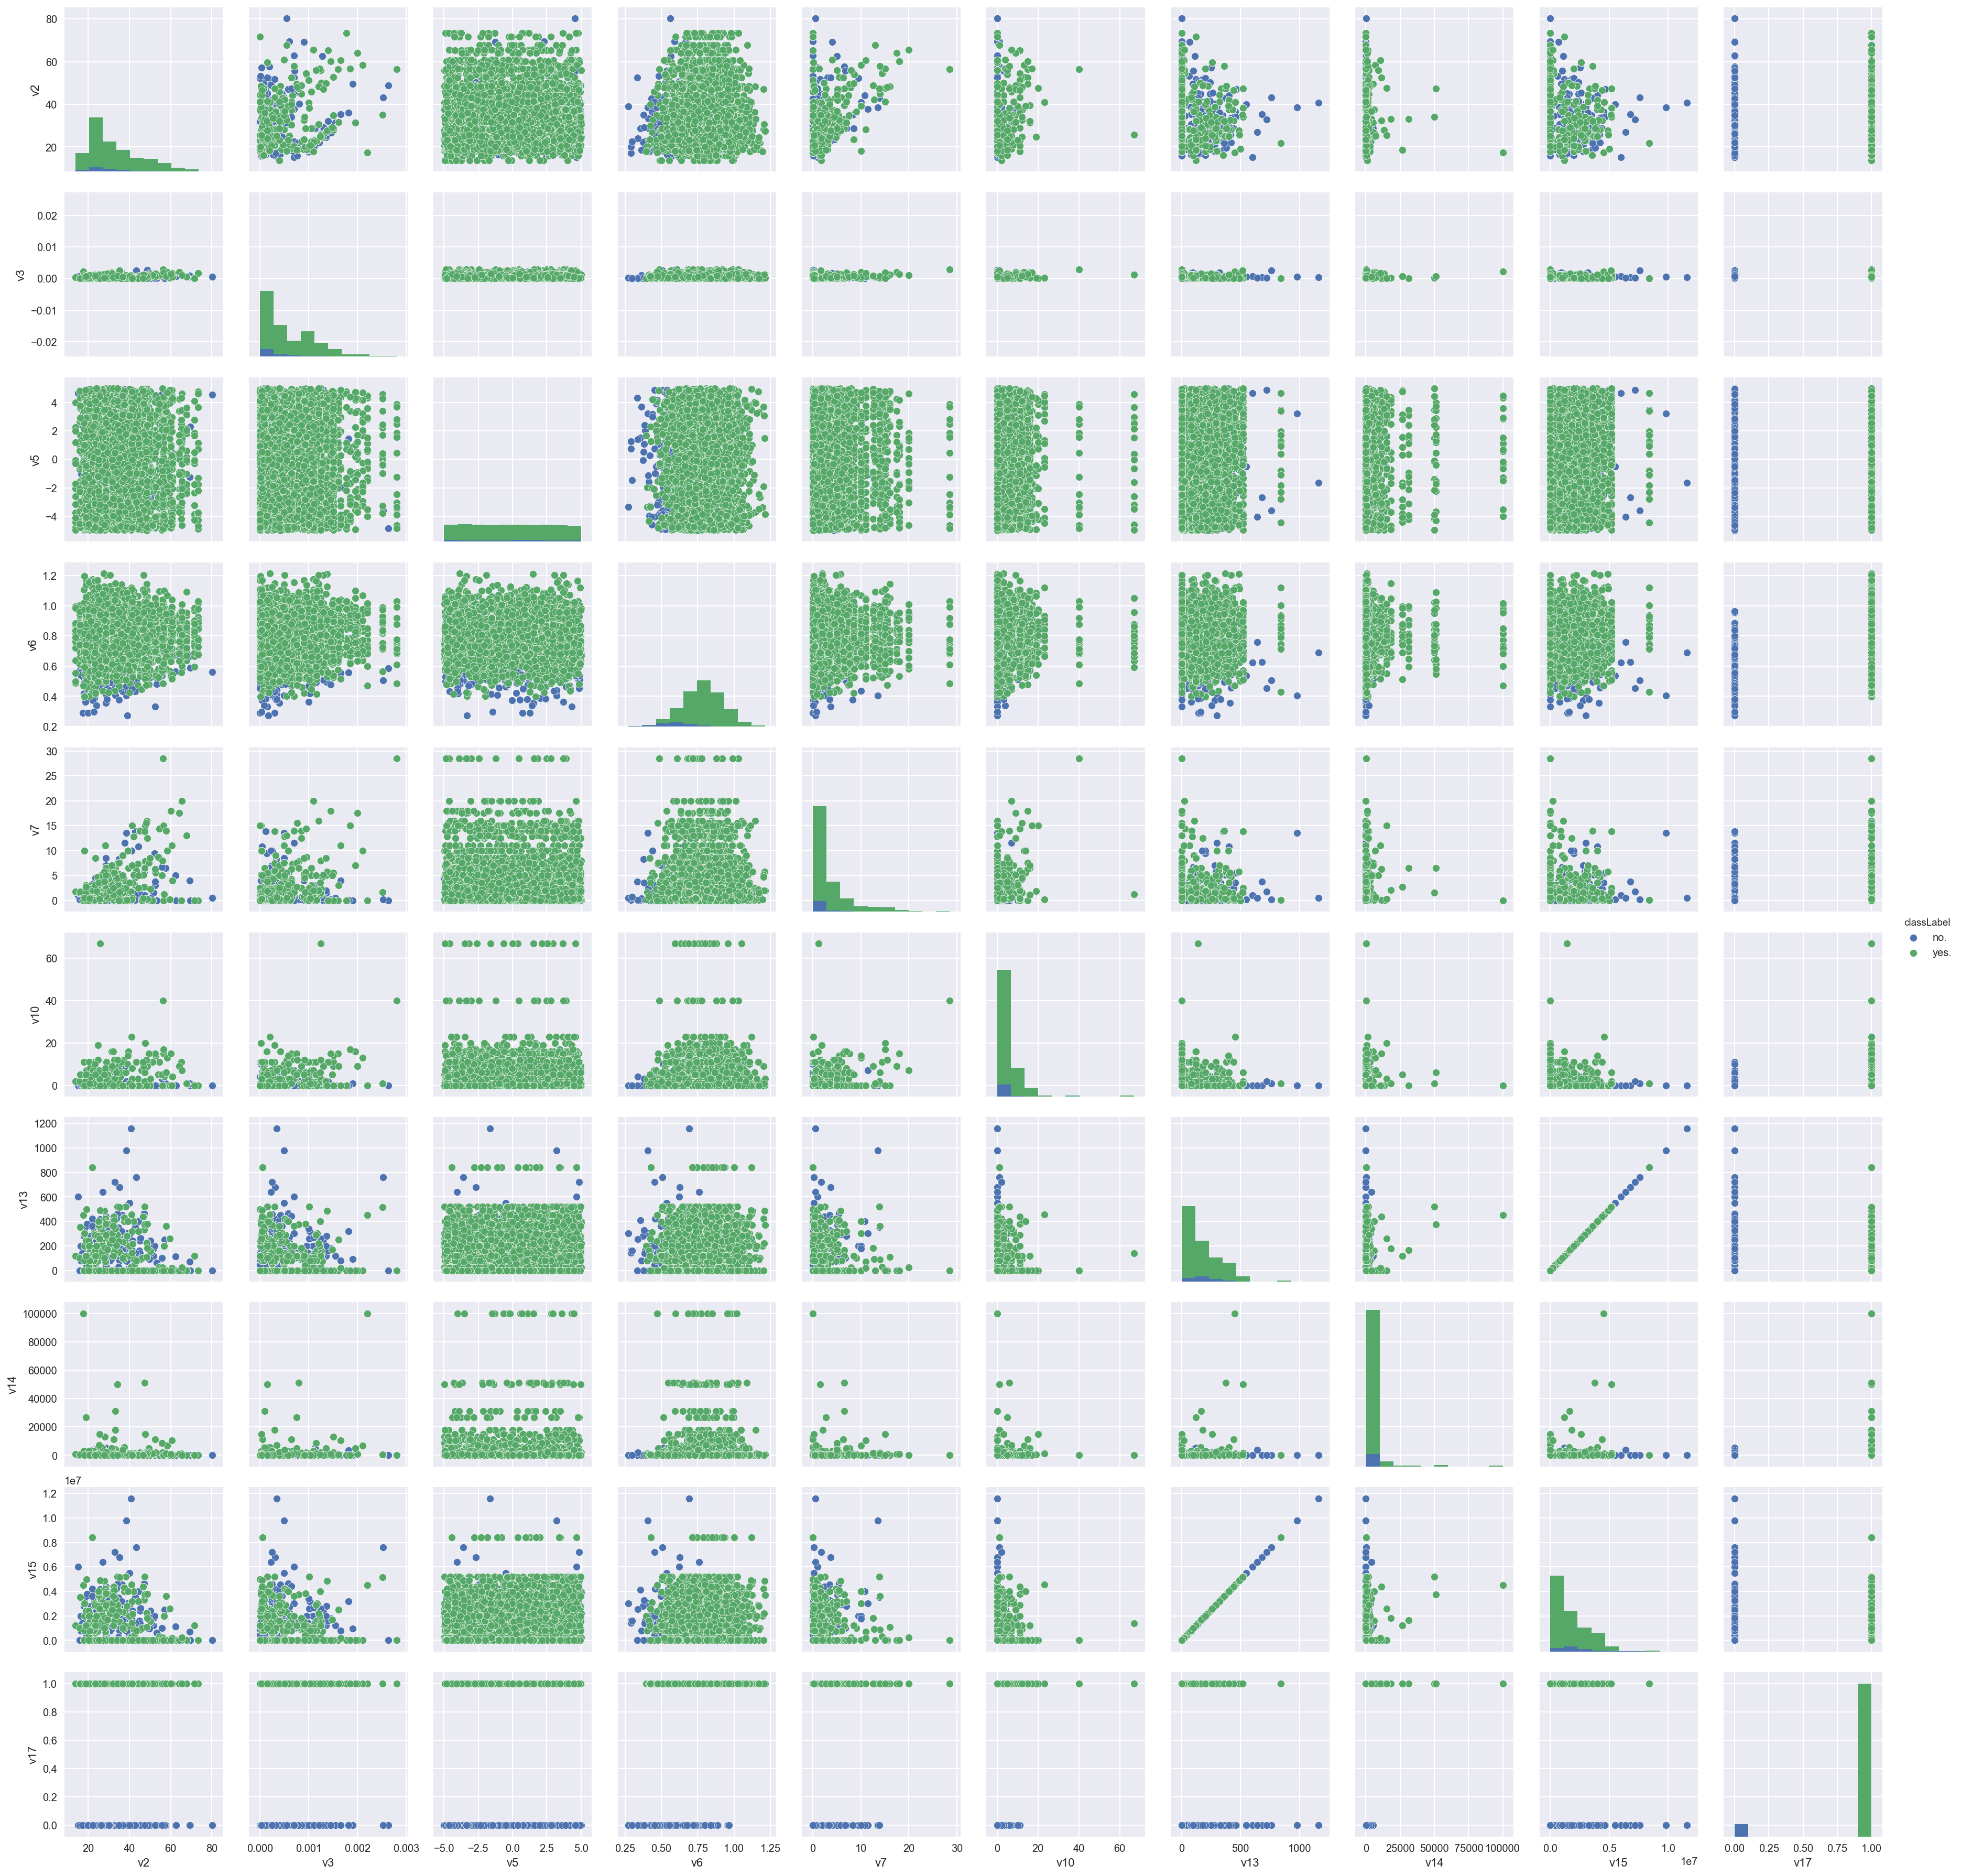

In [109]:
sns.pairplot(train_median_freq, hue="classLabel") # all the numerical features 10x10 plots!

In [88]:
corr_matrix["v17"].sort_values(ascending=False)  

v17    1.000000
v6     0.380637
v10    0.153039
v7     0.141394
v3     0.102007
v14    0.066893
v2     0.062664
v5     0.005745
v13   -0.051580
v15   -0.051580
Name: v17, dtype: float64

In [89]:
corr_matrix["v7"].sort_values(ascending=False) 

v7     1.000000
v2     0.514231
v3     0.343848
v10    0.304266
v17    0.141394
v6     0.040617
v5    -0.003256
v14   -0.004123
v13   -0.211207
v15   -0.211207
Name: v7, dtype: float64

__COMMENT__: 
* v17 seems having the same "behaviour" of our target variable: 1 $\div$ 0 $\rightarrow$ Yes $\div$ No; 
* `v2` and `v7` have a fair degree of correlation: $\sim$ 50$\%$
* So, from the correlation matrix, the feature v6 seems to be a promising attribute to predict the classLabel

## 5. Prepare the Data for Machine Learning Algorithms

### 5.1 Scikit-Learn estimator API
`Scikit-Learn` provides a handy class to take care of missing values: `Imputer`. The class belongs to the so-called transformer classes in `scikit-learn` that are used for data transformation. First, you need to create an `Imputer`, specyfing that you want to replace each (e.g. numeric) attribute's missing values with the median of that attribute:  
    
* `from sklearn.preprocessing import Imputer`  
* `imputer = Imputer(strategy="median")`  
      
Now we can fit the `imputer` instance to the training data using the `fit()` method:
* `imputer.fit(training_set)`

The `imputer` has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. Now we can use this "trained" `imputer` to transform the training set by replacing missing values by the learned medians: 

* `imputed_data = imputer.transform(training_set.values)`

Below an example on how to use the class `Imputer`

In [91]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [90]:
# Since the median can only on numerical features ...
cat_columns = train_cp.select_dtypes(include=['object', 'bool']).columns

In [92]:
cat_columns

Index(['v1', 'v4', 'v8', 'v9', 'v11', 'v12', 'v16', 'classLabel'], dtype='object')

In [94]:
train_cp_num = train_cp.drop(cat_columns, axis=1) # note that drop() creates a copy of the data 

In [100]:
train_cp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 10 columns):
v2     3661 non-null float64
v3     3700 non-null float64
v5     3700 non-null float64
v6     3700 non-null float64
v7     3700 non-null float64
v10    3700 non-null int64
v13    3600 non-null float64
v14    3700 non-null int64
v15    3600 non-null float64
v17    3700 non-null int64
dtypes: float64(7), int64(3)
memory usage: 289.1 KB


In [101]:
imputer.fit(train_cp_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [102]:
imputer.statistics_ 

array([ 2.86700000e+01,  4.25000000e-04, -5.27862075e-02,  7.87842393e-01,
        1.75000000e+00,  2.00000000e+00,  1.20000000e+02,  1.13000000e+02,
        1.20000000e+06,  1.00000000e+00])

In [103]:
X = imputer.transform(train_cp_num) # it's a plain NumPy array containing the trasformed features

If we want to put it back into a Pandas DataFrame, it's simple: 

In [104]:
train_cp_num_tr = pd.DataFrame(X, columns=train_cp_num.columns)

In [105]:
train_cp_num_tr.info() # the 10 numerical features have not anymore NaNs 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 10 columns):
v2     3700 non-null float64
v3     3700 non-null float64
v5     3700 non-null float64
v6     3700 non-null float64
v7     3700 non-null float64
v10    3700 non-null float64
v13    3700 non-null float64
v14    3700 non-null float64
v15    3700 non-null float64
v17    3700 non-null float64
dtypes: float64(10)
memory usage: 289.1 KB


In [114]:
train_cp_num_tr.describe()

v2           v3           v5           v6           v7  \
count  3700.000000  3700.000000  3700.000000  3700.000000  3700.000000   
mean     32.776962     0.000585    -0.053318     0.784188     3.439496   
std      12.606362     0.000540     2.871240     0.136514     4.335229   
min      13.750000     0.000000    -4.996939     0.273945     0.000000   
25%      23.000000     0.000150    -2.516349     0.693130     0.500000   
50%      28.670000     0.000425    -0.052786     0.787842     1.750000   
75%      40.000000     0.000963     2.406251     0.876052     5.000000   
max      80.250000     0.002800     4.999274     1.215066    28.500000   

               v10          v13            v14           v15          v17  
count  3700.000000  3700.000000    3700.000000  3.700000e+03  3700.000000  
mean      4.160000   161.541081    2246.705946  1.615411e+06     0.925405  
std       6.750553   154.077610    8708.571126  1.540776e+06     0.262772  
min       0.000000     0.000000       0.000000  0.000000e+00     0.000000  
25%       0.000000     0.000000       0.000000  0.000000e+00     1.000000  
50%       2.000000   120.000000     113.000000  1.200000e+06     1.000000  
75%       6.000000   274.000000    1059.750000  2.740000e+06     1.000000  
max      67.000000  1160.000000  100000.000000  1.160000e+07     1.000000

In [115]:
train_copy_num_tr.head()

v2        v3        v5        v6     v7  v10    v13    v14        v15  \
0  17.92  0.000054 -0.840182  0.522883  1.750  1.0   80.0    5.0   800000.0   
1  16.92  0.000034 -2.159635  0.774187  0.290  0.0  200.0    0.0  2000000.0   
2  31.25  0.000112  1.750687  0.760363  0.000  1.0   96.0   19.0   960000.0   
3  48.17  0.000133  4.174871  0.888963  0.335  0.0    0.0  120.0        0.0   
4  32.33  0.000350 -3.785479  0.489024  0.500  0.0  232.0    0.0  2320000.0   

   v17  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

### 5.2 Custom Transformers 
It's time to prepare the data for our Machine Learning algorithms. Although `Scikit-Learn` provides many useful transformers, we will write our own functions such as custom cleanup operations, instead of just doing it manually. 
First, let's separate the predictors and the labels since we don't necessarily want to apply the same transformations to the predictors and the target values. Before doing that we will: 
* drop the `v16` feature: in the initial training set, it contains almost 60$\%$ of NaNs; 
* drop the `v15` feature: it is perfectly correlated with the predictor `v13`, and actually there is scale factor of 10$^{4}$ (to avoid multicollinearity problem, we remove one of them); 
* finally drop the `v17` feature: is the numeric binary "version" of the target variable `classLabel`, which we are going to convert soon from string to binaries: Yes $\div$ No $\rightarrow$ 1 $\div$ 0 

In [110]:
# Here is the complete dictionary for cleaning up the classLabel column:
cleanup_nums = {"classLabel" : {"yes." : 1, "no." : 0}}

In [111]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 18 columns):
v1            3661 non-null object
v2            3661 non-null float64
v3            3700 non-null float64
v4            3636 non-null object
v5            3700 non-null float64
v6            3700 non-null float64
v7            3700 non-null float64
v8            3700 non-null object
v9            3700 non-null object
v10           3700 non-null int64
v11           3700 non-null object
v12           3700 non-null object
v13           3600 non-null float64
v14           3700 non-null int64
v15           3600 non-null float64
v16           1555 non-null object
v17           3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(7), int64(3), object(8)
memory usage: 520.4+ KB


In [112]:
train_cp.replace(cleanup_nums, inplace=True)

In [113]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 18 columns):
v1            3661 non-null object
v2            3661 non-null float64
v3            3700 non-null float64
v4            3636 non-null object
v5            3700 non-null float64
v6            3700 non-null float64
v7            3700 non-null float64
v8            3700 non-null object
v9            3700 non-null object
v10           3700 non-null int64
v11           3700 non-null object
v12           3700 non-null object
v13           3600 non-null float64
v14           3700 non-null int64
v15           3600 non-null float64
v16           1555 non-null object
v17           3700 non-null int64
classLabel    3700 non-null int64
dtypes: float64(7), int64(4), object(7)
memory usage: 520.4+ KB


In [115]:
training = train_cp.drop(["v16", "v15", "v17", "classLabel"], axis = 1) 
training_labels = train_cp["classLabel"].copy()

In [116]:
training.head()

v1     v2        v3 v4        v5        v6     v7 v8 v9  v10 v11 v12    v13  \
0  a  17.92  0.000054  u -0.840182  0.522883  1.750  f  t    1   t   g   80.0   
1  b  16.92  0.000034  y -2.159635  0.774187  0.290  f  f    0   f   s  200.0   
2  b  31.25  0.000112  u  1.750687  0.760363  0.000  f  t    1   f   g   96.0   
3  a  48.17  0.000133  u  4.174871  0.888963  0.335  f  f    0   f   g    0.0   
4  b  32.33  0.000350  u -3.785479  0.489024  0.500  f  f    0   t   g  232.0   

   v14  
0    5  
1    0  
2   19  
3  120  
4    0

In [117]:
training.describe()

v2           v3           v5           v6           v7  \
count  3661.000000  3700.000000  3700.000000  3700.000000  3700.000000   
mean     32.820713     0.000585    -0.053318     0.784188     3.439496   
std      12.666181     0.000540     2.871240     0.136514     4.335229   
min      13.750000     0.000000    -4.996939     0.273945     0.000000   
25%      23.000000     0.000150    -2.516349     0.693130     0.500000   
50%      28.670000     0.000425    -0.052786     0.787842     1.750000   
75%      40.830000     0.000963     2.406251     0.876052     5.000000   
max      80.250000     0.002800     4.999274     1.215066    28.500000   

               v10          v13            v14  
count  3700.000000  3600.000000    3700.000000  
mean      4.160000   162.695000    2246.705946  
std       6.750553   156.045682    8708.571126  
min       0.000000     0.000000       0.000000  
25%       0.000000     0.000000       0.000000  
50%       2.000000   120.000000     113.000000  
75%       6.000000   280.000000    1059.750000  
max      67.000000  1160.000000  100000.000000

In [118]:
training.describe(include=['object', 'bool'])

v1    v4    v8    v9   v11   v12
count   3661  3636  3700  3700  3700  3700
unique     2     3     2     2     2     3
top        b     u     t     t     f     g
freq    2382  3055  3171  2239  1924  3430

In [120]:
training_labels.head() # pandas Series

0    0
1    0
2    0
3    0
4    0
Name: classLabel, dtype: int64

In [127]:
training_labels.describe()

count    3700.000000
mean        0.925405
std         0.262772
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: classLabel, dtype: float64

It would be nice if we could feed a Pandas `DataFrame` directly into our pipeline, instead of having to first manually extract the numerical columns into a `NumPy` array (or encoding categorical attributes ... see below). We can write a custom transformer for this task:

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """Transform the data by selecting the desired attributes, 
    dropping the rest, and converting the resulting DataFrame to 
    a NumPy array. 
    --------
    Args:
        BaseEstimator: a Scikit-Learn base class
        TransformerMixin: ""    ""    ""
    --------
    Returns:
        X: a NumPy array
    """
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [122]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values. Columns of dtype object are 
        imputed with the most frequent value in column.
        Columns of other types are imputed with median of column.
        --------
        Args: 
            TransformerMixin: a base class
        --------
        Returns: 
            X: a Pandas DataFrame with NaNs imputed
            
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[col].value_counts().index[0]
            if X[col].dtype == np.dtype('O') else X[col].median() for col in X],
            index=X.columns) # imputer strategy = "median"

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [123]:
training_imp = DataFrameImputer().fit_transform(training) # fit_transform() is a method in TransformerMixin class

In [124]:
training_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 14 columns):
v1     3700 non-null object
v2     3700 non-null float64
v3     3700 non-null float64
v4     3700 non-null object
v5     3700 non-null float64
v6     3700 non-null float64
v7     3700 non-null float64
v8     3700 non-null object
v9     3700 non-null object
v10    3700 non-null int64
v11    3700 non-null object
v12    3700 non-null object
v13    3700 non-null float64
v14    3700 non-null int64
dtypes: float64(6), int64(2), object(6)
memory usage: 404.8+ KB


In [125]:
training_imp.head()

v1     v2        v3 v4        v5        v6     v7 v8 v9  v10 v11 v12    v13  \
0  a  17.92  0.000054  u -0.840182  0.522883  1.750  f  t    1   t   g   80.0   
1  b  16.92  0.000034  y -2.159635  0.774187  0.290  f  f    0   f   s  200.0   
2  b  31.25  0.000112  u  1.750687  0.760363  0.000  f  t    1   f   g   96.0   
3  a  48.17  0.000133  u  4.174871  0.888963  0.335  f  f    0   f   g    0.0   
4  b  32.33  0.000350  u -3.785479  0.489024  0.500  f  f    0   t   g  232.0   

   v14  
0    5  
1    0  
2   19  
3  120  
4    0

#### 5.2.1 Handling Text and Categorical Attributes
Most Machine Learning algorithms prefer to work with numbers, so we have to convert text labels to numbers. One approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number.  
__Label Encoding__ gives numerical aliases to different classes. For example, if I have ‘eggs’, ‘butter’ and ‘milk’ in a column, it will assign them 0,1 and 2. The problem with this approach is that there is no relation between these three classes yet. Our Machine Learning algorithms will assume that two nearby values are more similar than two distants values.   
To fix this issue, is to create one binary attribute per category. In the above example, we will get three columns and the presence of a class will be represented in binary like format. But, here the three classes are separated out to three different columns(features). The algorithm is only worried about their presence/absence without making any assumptions of their relationship. This is called _One-Hot Encoding_. This estimator transforms each categorical feature with m possible values into m binary features, with only one active.

**Warning**: in the textbook "Hands-On Machine Learning with Scikit-Lern & TensorFlow"it is suggested to use the `LabelBinarizer` class at this point. This was incorrect: just like the `LabelEncoder` class, the `LabelBinarizer` class was designed to preprocess labels, not input features. A better solution is to use `Scikit-Learn`'s upcoming `CategoricalEncoder` class: it will soon be added to `Scikit-Learn`, and in the meantime you can use the code below (copied from [https://github.com/scikit-learn/scikit-learn/pull/9151](https://github.com/scikit-learn/scikit-learn/pull/9151)).

In [128]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

Let's make an example of _one-hot encoding_ in Scikit-Learn. The `CategoricalEncoder` expects a 2D array containing one or more categorical input features. We need to reshape the categorical features to a 2D array:

In [144]:
training_onecat = training_imp["v4"]
training_onecat.head(10)

0    u
1    y
2    u
3    u
4    u
5    y
6    u
7    y
8    u
9    u
Name: v4, dtype: object

In [146]:
cat_encoder = CategoricalEncoder()
training_onecat_reshaped = training_onecat.values.reshape(-1, 1)
training_onecat_1hot = cat_encoder.fit_transform(training_onecat_reshaped)
training_onecat_1hot

<3700x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3700 stored elements in Compressed Sparse Row format>

The default encoding is one-hot, and it returns a sparse array.

In [147]:
cat_encoder.categories_

[array(['l', 'u', 'y'], dtype=object)]

#### 5.2.2 Feature Scaling & Transformation pipelines
One of the most important data transformations we need to apply is the __features scaling__. Basically most of the machine learning algorithms don't work very well if the features have a different set of values. Standardization of datasets is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like *standard normally distributed* data: Gaussian with zero mean and unit variance. In practice we often ignore the shape of the distribution and just transform the data to center and scale by dividing by the standard deviation.

If the input variables are combined via a distance function (such as Euclidean distance), standardizing inputs can be crucial. If one input has a range of 0 to 1, while another input has a range of 0 to 1,000,000, then the contribution of the first input to the distance will be swamped by the second input.  
Standardization is much less affected by outliers. `Scikit-Learn` provides a transformer called `StandardScaler` for standadization: **mean=0 and std=1**. 

Given that, there are may data transformation steps that need to be executed in the right order. Fortunately, `Scikit-Learn` provides the `Pipeline` class to help with such squences of transformations.  
Below, we run a full pipeline of transformations on numerical and categorical attributes:

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [129]:
num_attribs = list(training_imp.select_dtypes(include=[np.number]))

In [130]:
num_attribs # numerical features

['v2', 'v3', 'v5', 'v6', 'v7', 'v10', 'v13', 'v14']

In [131]:
cat_attribs = list(training_imp.select_dtypes(include=[np.object]))

In [132]:
cat_attribs # as a 2-dimensional array with one column, i.e. a column vector.

['v1', 'v4', 'v8', 'v9', 'v11', 'v12']

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [136]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
])


cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")), # Warning: a 2D array is expected
])

In [138]:
from sklearn.pipeline import FeatureUnion # Join the two pipelines in a single pipeline

In [139]:
# A full pipeline handling both numerical and categorical attributes:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [140]:
training_prepared = full_pipeline.fit_transform(training_imp)

In [141]:
training_prepared.shape

(3700, 22)

In [142]:
training_prepared

array([[-1.17868819, -0.98270677, -0.27408725, ...,  1.        ,
         0.        ,  0.        ],
       [-1.25802394, -1.02066075, -0.73369053, ...,  0.        ,
         0.        ,  1.        ],
       [-0.12114268, -0.87439905,  0.62838652, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.1105177 ,  0.61506349,  1.4497989 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.39247094, -0.79756537,  1.22552258, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.31520392, -0.13383346,  1.5821624 , ...,  1.        ,
         0.        ,  0.        ]])

Let's prepare now the `validation_prepared` set:

In [181]:
valid_cp.replace(cleanup_nums, inplace=True)

In [182]:
validation = valid_cp.drop(["v16", "v15", "v17", "classLabel"], axis = 1) 
validation_labels = valid_cp["classLabel"].copy()

In [183]:
validation.head()

v1     v2        v3 v4        v5        v6     v7 v8 v9  v10 v11 v12    v13  \
0  b  32.33  0.000750  u  0.840107  0.544982  1.585  t  f    0   t   s  420.0   
1  b  23.58  0.000179  u -4.174396  0.864362  0.540  f  f    0   t   g  136.0   
2  b  36.42  0.000075  y  2.232226  0.627476  0.585  f  f    0   f   g  240.0   
3  b  18.42  0.001041  y -2.469970  0.846741  0.125  t  f    0   f   g  120.0   
4  b  24.50  0.001334  y -3.149422  0.321087  0.040  f  f    0   t   g  120.0   

   v14  
0    0  
1    1  
2    3  
3  375  
4  475

In [184]:
validation.describe()

v2          v3          v5          v6          v7         v10  \
count  197.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    32.083198    0.000460   -0.407180    0.687015    2.036825    2.795000   
std     12.209125    0.000494    2.787269    0.200942    2.739335    4.233508   
min     15.920000    0.000000   -4.990240   -0.038309    0.000000    0.000000   
25%     22.670000    0.000078   -2.720714    0.565307    0.250000    0.000000   
50%     29.670000    0.000260   -0.583593    0.699364    1.042500    0.000000   
75%     39.080000    0.000750    1.890911    0.822634    2.656250    5.000000   
max     76.750000    0.002508    4.988798    1.181493   20.000000   20.000000   

               v13           v14  
count   197.000000    200.000000  
mean    199.903553    659.720000  
std     209.373399   1603.900294  
min       0.000000      0.000000  
25%      80.000000      0.000000  
50%     160.000000      4.500000  
75%     280.000000    500.000000  
max    2000.000000  10000.000000

In [191]:
validation_imp = DataFrameImputer().fit_transform(validation) 

In [192]:
validation_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
v1     200 non-null object
v2     200 non-null float64
v3     200 non-null float64
v4     200 non-null object
v5     200 non-null float64
v6     200 non-null float64
v7     200 non-null float64
v8     200 non-null object
v9     200 non-null object
v10    200 non-null int64
v11    200 non-null object
v12    200 non-null object
v13    200 non-null float64
v14    200 non-null int64
dtypes: float64(6), int64(2), object(6)
memory usage: 22.0+ KB


In [193]:
num_attribs = list(validation_imp.select_dtypes(include=[np.number]))

In [194]:
num_attribs

['v2', 'v3', 'v5', 'v6', 'v7', 'v10', 'v13', 'v14']

In [195]:
cat_attribs = list(validation_imp.select_dtypes(include=[np.object]))

In [196]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
])


cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")), # Warning: a 2D array is expected
])

In [197]:
# A full pipeline handling both numerical and categorical attributes:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [199]:
validation_prepared = full_pipeline.fit_transform(validation_imp)

In [200]:
validation_prepared.shape

(200, 22)

In [201]:
validation_prepared

array([[ 0.02340782,  0.5885902 ,  0.44861733, ...,  0.        ,
         0.        ,  1.        ],
       [-0.70033224, -0.57071337, -1.35497103, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.36170461, -0.78186499,  0.94932667, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.1006619 , -0.93413778,  0.62989131, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02374066, -0.85800138,  0.05080929, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15525258,  0.3855598 ,  0.54017834, ...,  0.        ,
         0.        ,  0.        ]])

## 6. Select and Train a Model

It's not possible to know in advance which algorithm will work better with our dataset. We need to compare a few and select the one with the "best score".

### 6.1 Comparing multiple algorithms
To compare multiple algorithms with the same dataset, let's start with the `Scikit-Learn`'s *K-fold cross-validation* feature: different subsets of the training set serve as the validation set. For example, for a 3-fold cross validation, the data is divided into 3 sets: A, B, and C. A model is first trained on A and B combined as the training set, and evaluated on the validation set C. Next, a model is trained on A and C combined as the training set, and evaluated on validation set B. And so on, with the model performance from the 3 folds being averaged in the end.
There is a very nice utility in `Scikit-Learn` called `model_selection`. We create a list of algorithms and then we score them using the same comparison method. At the end we pick the one with the best score.

In [148]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [149]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

In [152]:
# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [153]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X_train = training_prepared
Y_train = training_labels

In [154]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.945405 (0.095859)
KNN: 0.938919 (0.151439)
NB: 0.626757 (0.049430)
SVC: 0.927297 (0.171793)
LSVC: 0.946757 (0.093500)
RFC: 0.971081 (0.065838)
DTR: 0.957568 (0.082661)


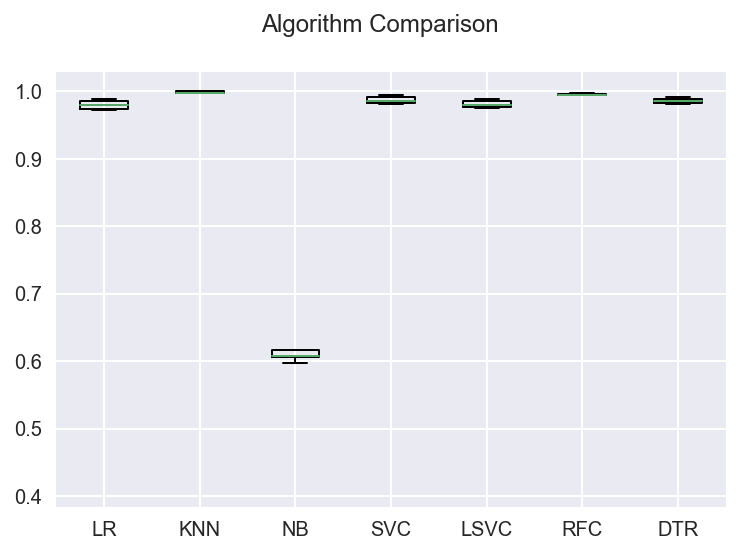

In [157]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 6.1.2 Fine-Tune Model
Let's assume that we now have a shortlist of promising models (e.g. `RFC`, `DTR`, `LR`). 
The default parameters for an algorithm are rarely the best ones for our dataset. Using sklearn we can easily build a parameters grid and try all the possible combinations. At the end we inspect the `best_estimator_` property and get the best ones for our dataset.

In [202]:
from sklearn.model_selection import GridSearchCV

In [204]:
# we want to explore the RFC for the moment
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

model_rfc = RandomForestClassifier()

grid_search = GridSearchCV(model_rfc, param_grid, 
                           cv=10, scoring='accuracy')

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [205]:
# print the best score found
grid_search.best_score_

0.9864864864864865

In [206]:
# We can get the best estimator directly: 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [207]:
cvres = grid_search.cv_results_

In [208]:
cvres

{'mean_fit_time': array([0.0069227 , 0.02104924, 0.06163609, 0.00838261, 0.0251497 ,
        0.07564714, 0.00991163, 0.03114309, 0.09341249, 0.01186733,
        0.03775113, 0.11343021, 0.00802333, 0.02469077, 0.00911763,
        0.02885463, 0.01011562, 0.03299797]),
 'std_fit_time': array([0.00048962, 0.00130822, 0.00235507, 0.00045444, 0.0018822 ,
        0.00270227, 0.0010841 , 0.00163427, 0.00170518, 0.00071512,
        0.00149827, 0.00370024, 0.00096407, 0.001754  , 0.00109164,
        0.00084707, 0.00042632, 0.00172138]),
 'mean_score_time': array([0.00072727, 0.00132797, 0.00287645, 0.00070481, 0.00130291,
        0.00294528, 0.00067785, 0.00138047, 0.00281296, 0.00068183,
        0.00134101, 0.00295169, 0.00071433, 0.00132761, 0.00069463,
        0.00131011, 0.00069292, 0.00131958]),
 'std_score_time': array([2.60819900e-05, 4.61964468e-05, 2.78200975e-05, 3.90207241e-05,
        1.25771791e-04, 3.26421352e-04, 3.53929871e-05, 1.98857831e-04,
        6.54900034e-05, 3.50598229e-

In [209]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9772972972972973 {'max_features': 2, 'n_estimators': 3}
0.9840540540540541 {'max_features': 2, 'n_estimators': 10}
0.9848648648648649 {'max_features': 2, 'n_estimators': 30}
0.9789189189189189 {'max_features': 4, 'n_estimators': 3}
0.9837837837837838 {'max_features': 4, 'n_estimators': 10}
0.981081081081081 {'max_features': 4, 'n_estimators': 30}
0.9748648648648649 {'max_features': 6, 'n_estimators': 3}
0.9805405405405405 {'max_features': 6, 'n_estimators': 10}
0.9808108108108108 {'max_features': 6, 'n_estimators': 30}
0.9727027027027026 {'max_features': 8, 'n_estimators': 3}
0.9781081081081081 {'max_features': 8, 'n_estimators': 10}
0.9802702702702702 {'max_features': 8, 'n_estimators': 30}
0.9813513513513513 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.9862162162162162 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.9824324324324324 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.9864864864864865 {'bootstrap': False, 'max_features': 3, 'n_

So it seems that we obtain the best solution by setting the `bootstrap` = False, `max_features` = 3, `n_estimators` = 10.  
Let's apply now the best model on the validation set:

In [210]:
rfc = grid_search.best_estimator_

In [244]:
feature_importances = rfc.feature_importances_

In [245]:
attributes = num_attribs + cat_attribs

In [246]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1626262632003614, 'v6'),
 (0.1525937453552871, 'v12'),
 (0.09861112507072364, 'v3'),
 (0.096165096230872, 'v7'),
 (0.07582233915798392, 'v13'),
 (0.07582087726613183, 'v2'),
 (0.043298417159085514, 'v14'),
 (0.03389634775042415, 'v5'),
 (0.02359100940211578, 'v10'),
 (0.01221900168587002, 'v9'),
 (0.009973810589310999, 'v11'),
 (0.008659690348412335, 'v4'),
 (0.005146251053039031, 'v1'),
 (0.00029148278829787194, 'v8')]

In [212]:
rfc.fit(training_prepared, training_labels)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [234]:
predictions = rfc.predict(validation_prepared)

In [235]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [236]:
from sklearn.metrics import mean_squared_error

In [237]:
rfc_mse = mean_squared_error(validation_labels, predictions)

In [238]:
rfc_rmse = np.sqrt(rfc_mse)

In [239]:
print(rfc_rmse)

0.8803408430829505


In [240]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

In [241]:
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_valid)
    mse = mean_squared_error(y_valid, predictions)
    rmse = np.sqrt(mse)
    return mse

In [242]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_valid, y_valid, model)
    return train_error, validation_error

In [243]:
train_error, test_error = calc_metrics(training_prepared, training_labels, validation_prepared, validation_labels, rfc)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 0.0 | test error: 0.765
train/test: inf


In [221]:
from sklearn.metrics import confusion_matrix

In [224]:
confusion_matrix(validation_labels, predictions)

array([[29, 78],
       [77, 16]])

In [225]:
predictions = rfc.predict(training_prepared)

In [226]:
confusion_matrix(training_labels, predictions)

array([[ 276,    0],
       [   0, 3424]])

In [174]:
clf.fit(training_prepared, training_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [175]:
clf.feature_importances_

array([0.02442168, 0.03567259, 0.        , 0.23286863, 0.04812368,
       0.05156077, 0.02765435, 0.08834145, 0.        , 0.        ,
       0.        , 0.00063613, 0.        , 0.32362811, 0.14595717,
       0.02113543, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])